# 0.0 IMPORTS 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from tabulate import tabulate
from matplotlib import pyplot as plt
from IPython.core.display    import HTML

# 0.1 HELPS FUNCTIONS

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
def percentage (x):
    p = x * 100 
    
    return p

In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 0.2 LOADING THE DATAS

In [4]:
df_raw = pd.read_csv('/home/guilherme/Documentos/repos/pa_health_cross_sell/projeto/df_raw.csv')
df_raw.head()

,id,previously_insured,annual_premium,vintage,response,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage
0,7,0,23367.0,249,0,Male,23,11.0,152.0,1,< 1 Year,Yes
1,13,1,31409.0,221,0,Female,41,15.0,14.0,1,1-2 Year,No
2,18,1,46622.0,299,0,Female,25,35.0,152.0,1,< 1 Year,No
3,31,0,2630.0,136,0,Female,26,8.0,160.0,1,< 1 Year,No
4,39,0,42297.0,264,0,Male,45,8.0,124.0,1,1-2 Year,Yes


# 1.0 DESCRIPTION THE DATAS

In [5]:
df1 = df_raw.copy(deep=True)

## 1.1 RENAME COLUMNS

**The columns are in format snackcase. Then not is necessary rename the columns** 

In [6]:
df1.columns

Index(['id', 'previously_insured', 'annual_premium', 'vintage', 'response',
       'gender', 'age', 'region_code', 'policy_sales_channel',
       'driving_license', 'vehicle_age', 'vehicle_damage'],
      dtype='object')

## 1.2 DATA DIMENSIONS

In [7]:
print('The number of rows: {}'.format( df1.shape[0] ) )
print('The number of rows: {}'.format( df1.shape[1] ) )

The number of rows: 381109
The number of rows: 12


## 1.3 DATA TYPES

In [8]:
df1.dtypes

id                        int64
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
dtype: object

## 1.4 CHECK NA

In [9]:
df1.isna().sum()

id                      0
previously_insured      0
annual_premium          0
vintage                 0
response                0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
dtype: int64

## 1.5 CHANGE TYPES

In [10]:
df1['region_code']    = df1['region_code'].astype(int)

df1['annual_premium'] = df1['annual_premium'].astype(int)

df1['policy_sales_channel'] = df1['policy_sales_channel'].astype(int)

df1.dtypes

id                       int64
previously_insured       int64
annual_premium           int64
vintage                  int64
response                 int64
gender                  object
age                      int64
region_code              int64
policy_sales_channel     int64
driving_license          int64
vehicle_age             object
vehicle_damage          object
dtype: object

## 1.6 DESCRIPTIVE STASTITICS 

In [11]:
num_attributes = df1.select_dtypes(include = 'int64')
cat_attributes = df1.select_dtypes(exclude = 'int64')

## 1.7 NUMERIC ATTRIBUTES

In [12]:
# =========================== TENDENCY CENTRAL =============================================== #

#mean and median 
t1 = pd.DataFrame( num_attributes.apply( lambda x: np.mean(x)  ) ).T
t2 = pd.DataFrame( num_attributes.apply( lambda x: np.median(x) ) ).T

#
#min
d1 = pd.DataFrame( num_attributes.apply(lambda x: np.min(x) ) ).T

#max
d2 = pd.DataFrame( num_attributes.apply(lambda x: np.max(x) ) ).T

#range
d3 = pd.DataFrame( num_attributes.apply(lambda x: np.max(x) - np.min(x) ) ).T

#std 
d4 = pd.DataFrame( num_attributes.apply(lambda x: np.std(x) ) ).T

#skew
d5 = pd.DataFrame( num_attributes.apply(lambda x: x.skew() ) ).T

#kurtosis
d6 = pd.DataFrame( num_attributes.apply(lambda x: x.kurtosis() ) ).T

#concat the columns of metrics
metric = pd.concat( [t1,t2,d1,d2,d3,d4,d5,d6] ).T.reset_index()

#rename the columns
metric.columns = ['attributes','mean','median','min','max','range','std','skew','kurtosis']

#result
metric

,attributes,mean,median,min,max,range,std,skew,kurtosis
0,id,190555.000000,190555.0,1.0,381109.0,381108.0,110016.691870,-8.071174e-18,-1.200000
1,previously_insured,0.458210,0.0,0.0,1.0,1.0,0.498251,1.677471e-01,-1.971871
2,annual_premium,30564.389581,31669.0,2630.0,540165.0,537535.0,17213.132474,1.766087e+00,34.004569
3,vintage,154.347397,154.0,10.0,299.0,289.0,83.671194,3.029517e-03,-1.200688
4,response,0.122563,0.0,0.0,1.0,1.0,0.327935,2.301906e+00,3.298788
5,age,38.822584,36.0,20.0,85.0,65.0,15.511591,6.725390e-01,-0.565655
6,region_code,26.388807,28.0,0.0,52.0,52.0,13.229871,-1.152664e-01,-0.867857
7,policy_sales_channel,112.034295,133.0,1.0,163.0,162.0,54.203924,-9.000081e-01,-0.970810
8,driving_license,0.997869,1.0,0.0,1.0,1.0,0.046109,-2.159518e+01,464.354302


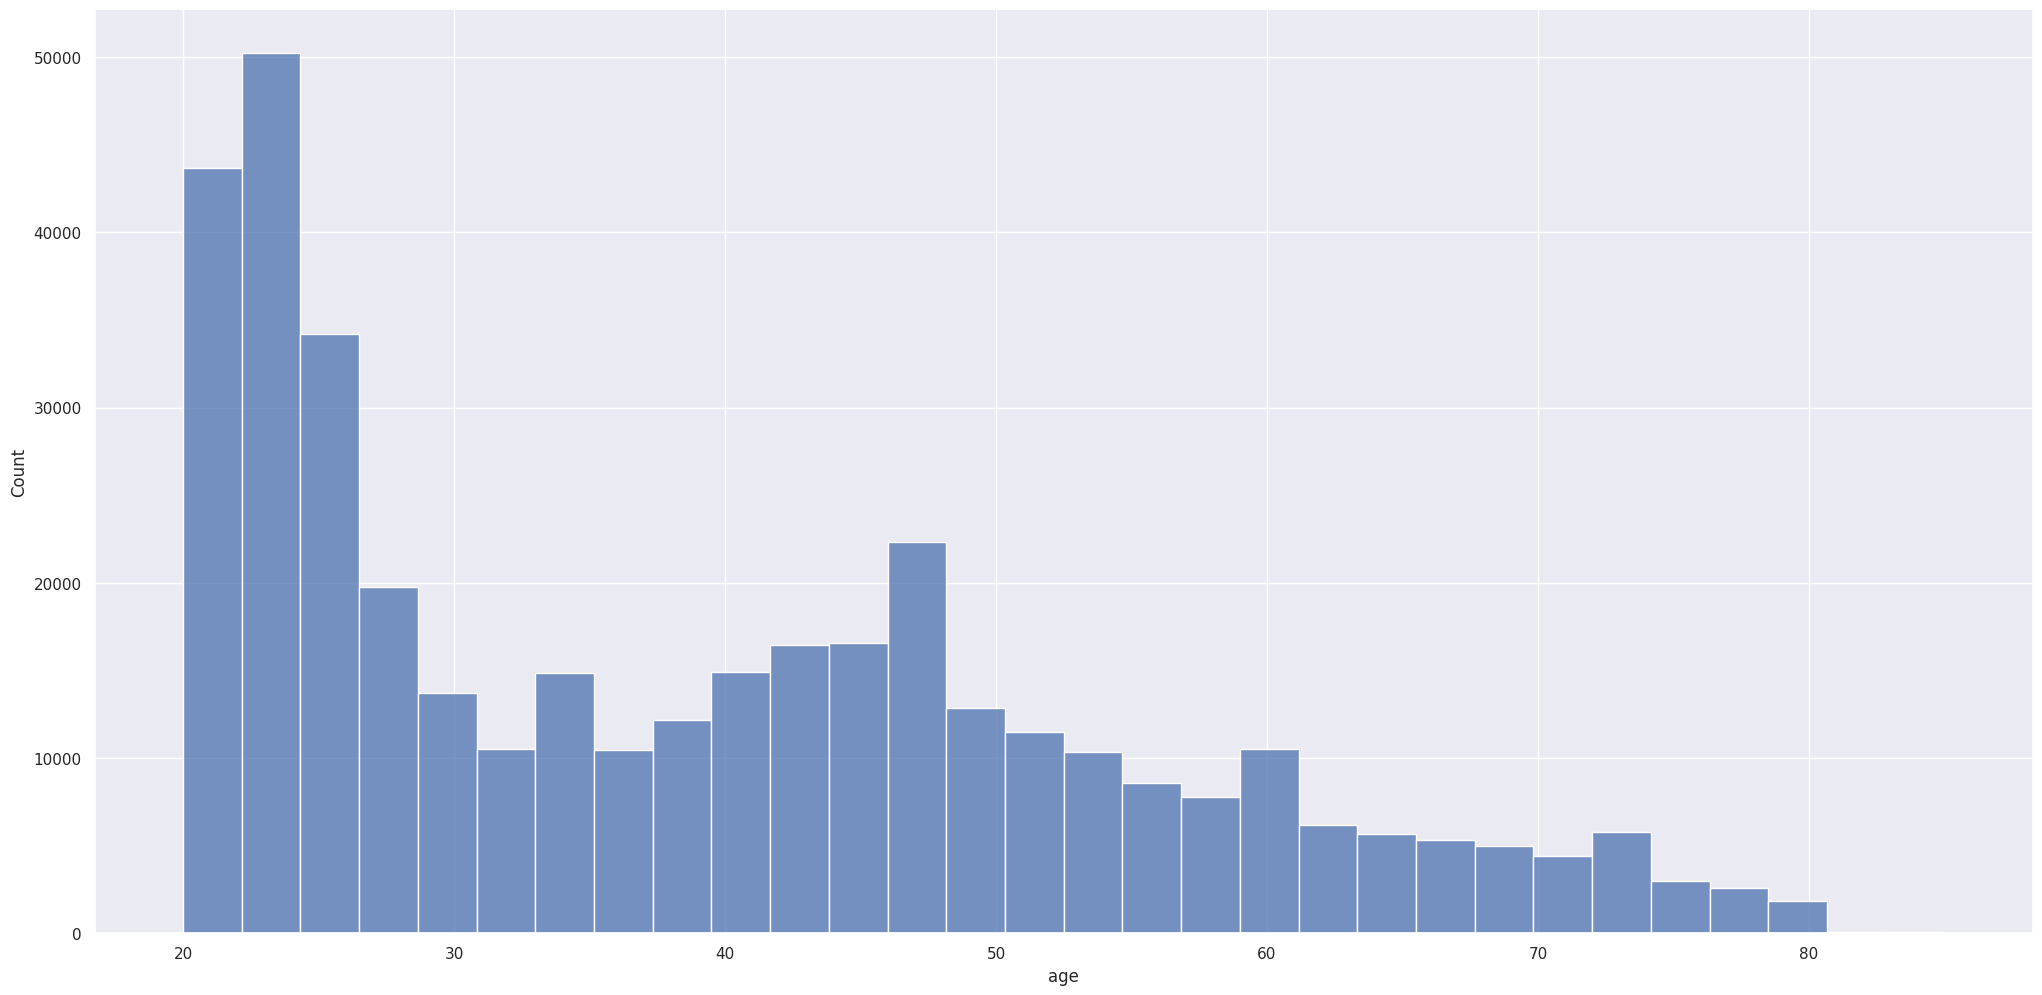

In [13]:
sns.histplot(df1['age'],bins=30);

## 1.7.1 CATEGORICAL ATTRIBUTES

In [14]:
#numbers of categorical attributes by feature
cat_attributes.apply(lambda x: x.unique().shape[0] )

gender            2
vehicle_age       3
vehicle_damage    2
dtype: int64

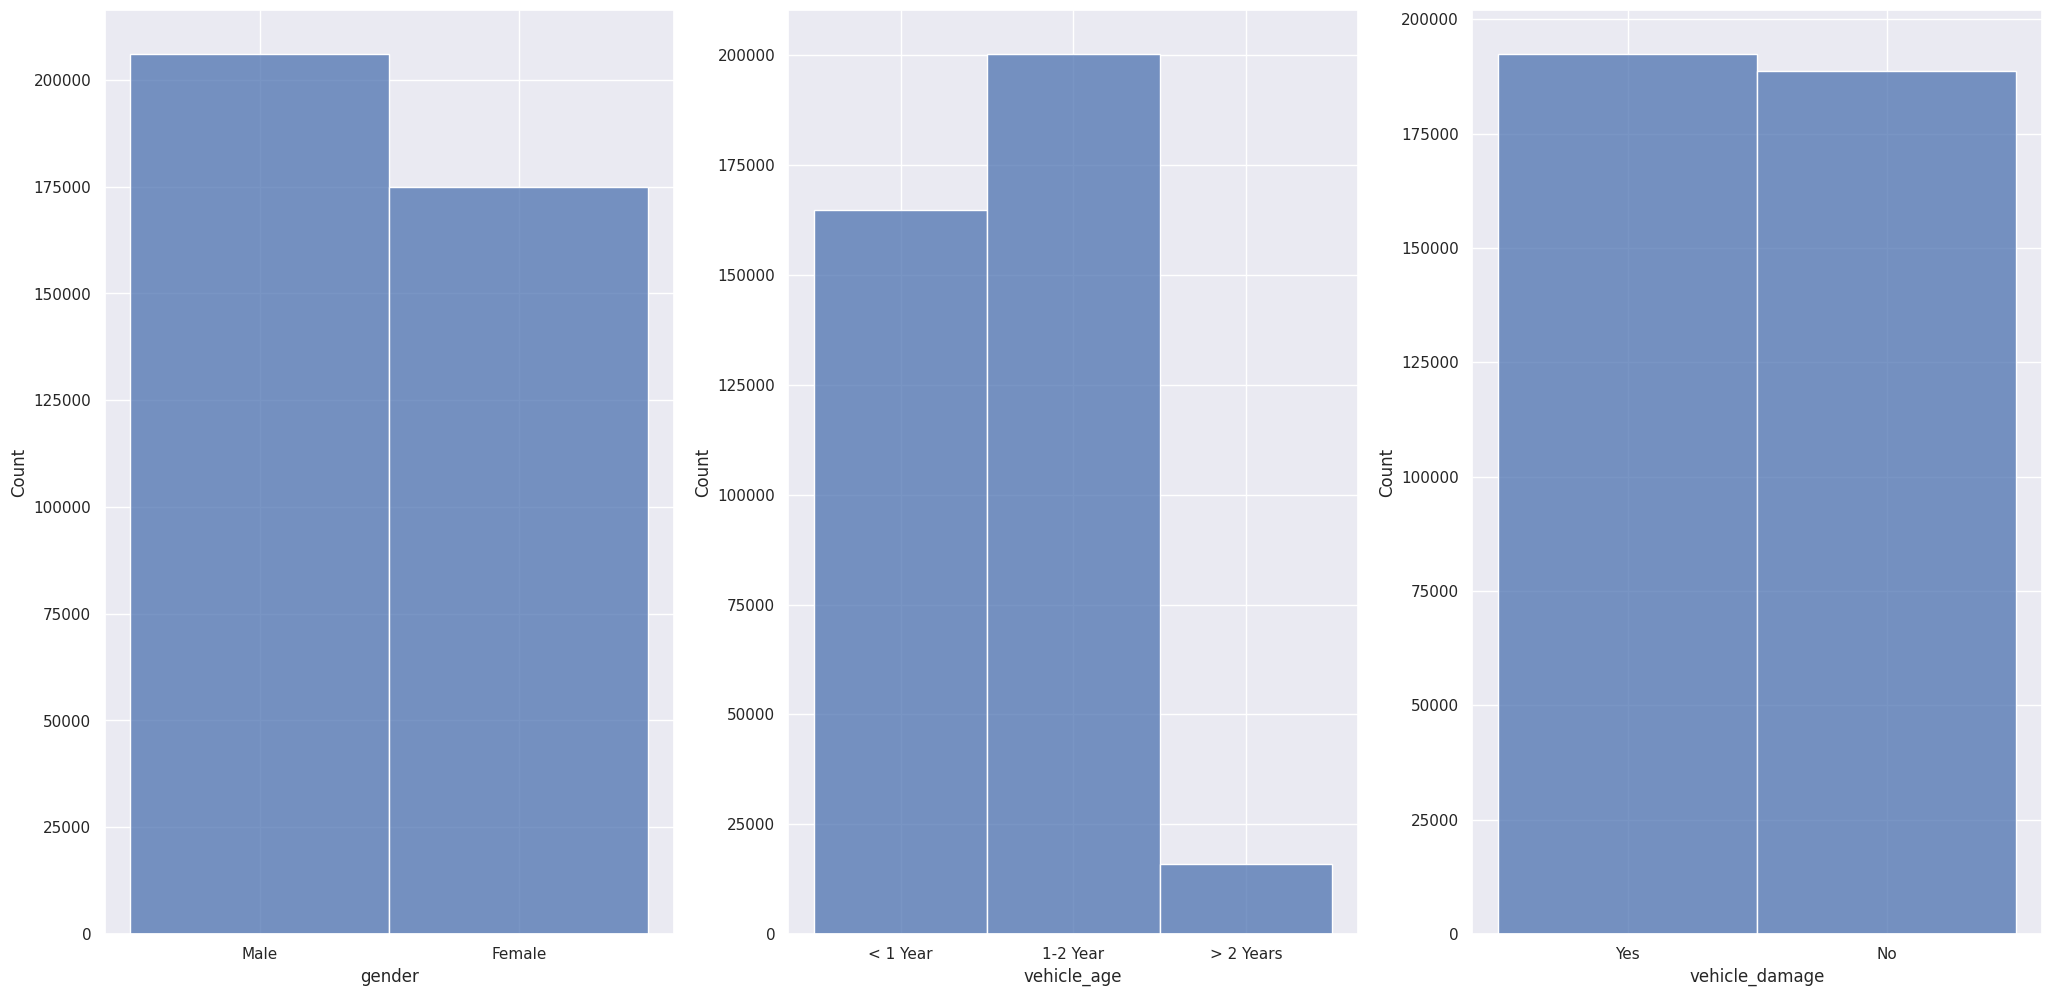

In [15]:
#plot of gender
plt.subplot(1,3,1)
sns.histplot(df1['gender'],bins=30);

#plot of vehicle age
plt.subplot(1,3,2)
sns.histplot(df1['vehicle_age'],bins=30);

#plot of vehicle damage
plt.subplot(1,3,3)
sns.histplot(df1['vehicle_damage'],bins=30);

# 2.0 FEATURE ENGINEERING

In [16]:
df2 = df1.copy(deep=True)

## 2.1 MIND MAP HPYOTHESIS

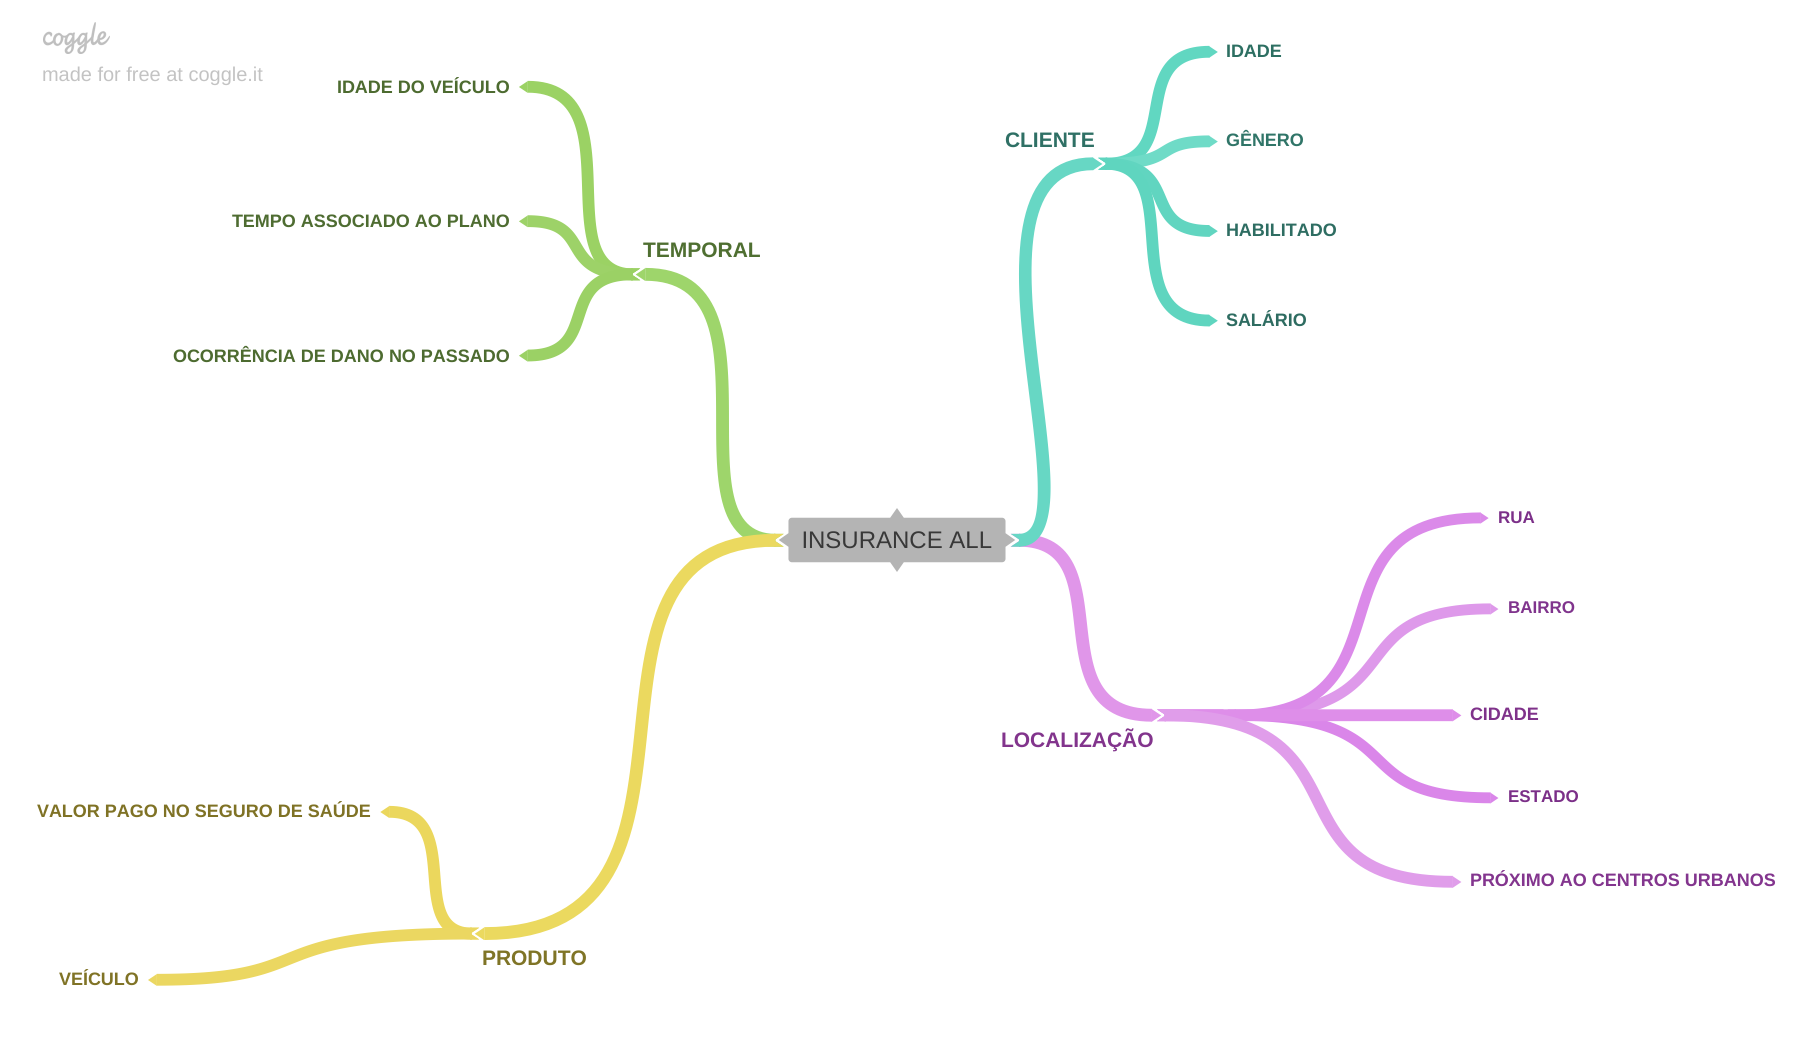

## 2.2 LIST HPYOTHESIS

## 2.3  HPYOTHESIS CUSTOMER

* Cliente mais velhos tem mais interesse em seguro automotivo

* Homens são mais habilitados do que mulheres

* Mulheres tem mais seguros automotivos do que homens

* Homens danificam mais os veículos do que mulheres

* Homens tem mais interesse em seguro veícular do que mulheres

* Homens possuem carros mais novos


## 2.4 HPYOTHESIS TEMPORAL

* O maior número de carros são de idade superior há 2 anos. 
* Pessoas que são mais tempo associadas ao plano de saúde contém mais seguro veícular. 
* Pessoas com mais tempo associada ao plano de saúde tem mais interesse ao seguro veícular.
* Carros mais velhos ocorrem mais danos.

## 2.5 HPYOTHESIS PRODUCT

* Pessoas que pagam mais pelo seguro de saúde tem menos interesse no seguro veícular
* Pessoas que pagam menos pelo seguro de saúde tem mais registros de danos no veículo
* Pessoas que pagam mais pelo seguro de saúde tem carros mais novos

## 2.6 LIST FINAL HPYOTHESIS 

**1** - Cliente mais velhos tem mais interesse em seguro automotivo

**2** - Homens são mais habilitados do que mulheres

**3** - Mulheres tem mais seguros automotivos do que homens

**4** - Homens danificam mais os veículos do que mulhereres.

**5** - Homens tem mais interesse em seguro veícular do que mulheres

**6** - Homens possuem carros mais novos

**7** -  O maior número de carros são de idade superior há 2 anos. 

**8** -  Pessoas com mais tempo associada ao plano de saúde tem mais interesse ao seguro veícular.

**9** -  Carros mais antigos ocorrem mais danos.

**10** - Pessoas que pagam mais pelo seguro de saúde tem menos interesse no seguro veícular

**11** - Pessoas que pagam menos pelo seguro de saúde tem mais registros de danos no veículo

**12** - Pessoas que pagam mais pelo seguro de saúde tem carros mais novos

## 2.7 FEATURE ENGERING

In [17]:
#rename the rows of colum vehicle age
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 0 if x== '< 1 Year' 
                                              else 2 if x== '1-2 Year'
                                              else 3 
                                              if x== '> 2 Years' else x)

#rename the rows of colum vehicle damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 0 if x=='No' else 1)

#convent the days in month
df2['vintage'] = df2['vintage'].apply(lambda x: x/30)

#convent the colum to type int
df2['vintage'] = df2['vintage'].astype('int')

# 3 - FILTERING THE DATA

### 3.1 - SELECT THE COLUMNS

# 4- Exploratory DATA ANALYSIS

In [18]:
df4 = df2.copy(deep=True)

## 4.1 ANALSY  UNIVARIABLE THE RESPONSE VARIABLE 

The number the people that interesting are: 46710
The number the people that not has interesting are: 334399


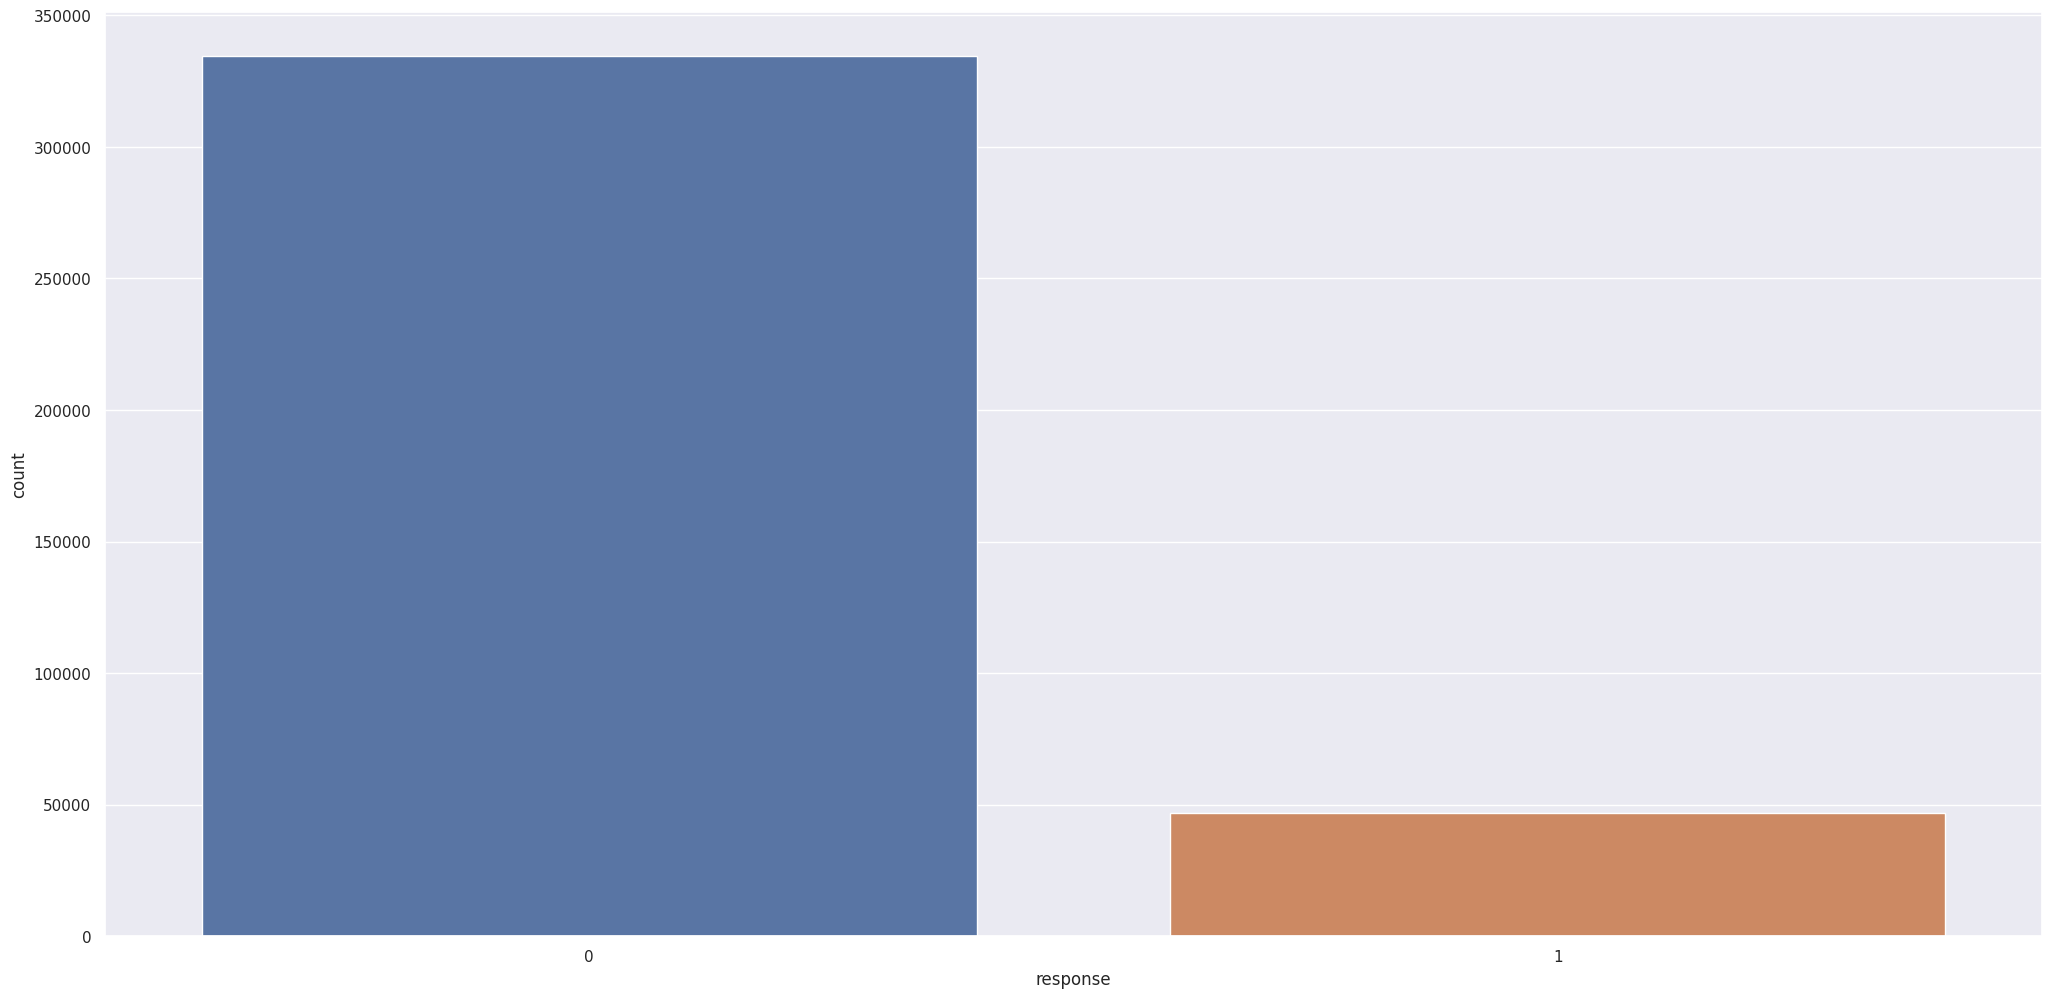

In [19]:
#people that has interesting
number_has_interesting= df4.loc[df4['response']==1]
print('The number the people that interesting are: {}'.format (len(number_has_interesting) ) )

#people that not has interesting
number_not_has_interesting= df4.loc[df4['response']==0]
print('The number the people that not has interesting are: {}'.format (len(number_not_has_interesting) ) )

#plot the response variable
sns.countplot(x= 'response', data= df4);

## 4.2 - ANALSY NUMERIC  

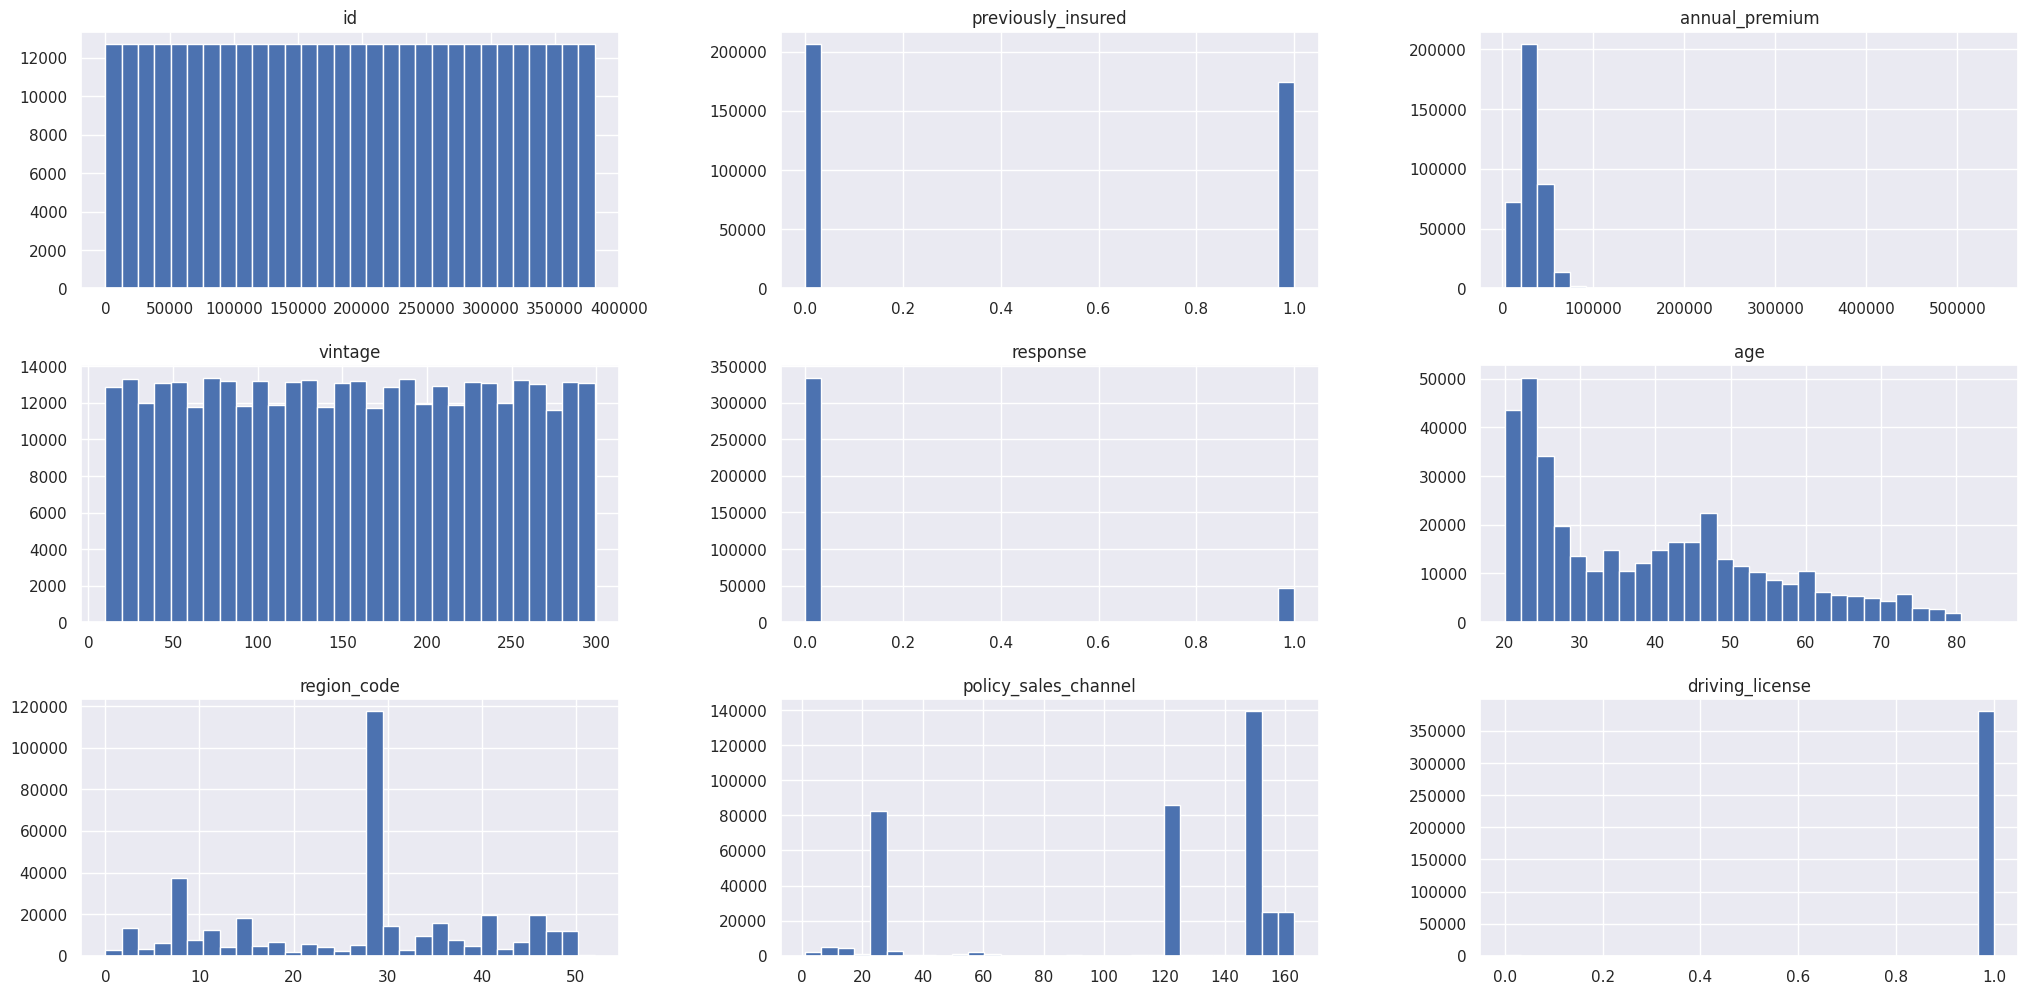

In [20]:
num_attributes.hist(bins=30);

## 4.3 ANALSY CATEGORICAL 

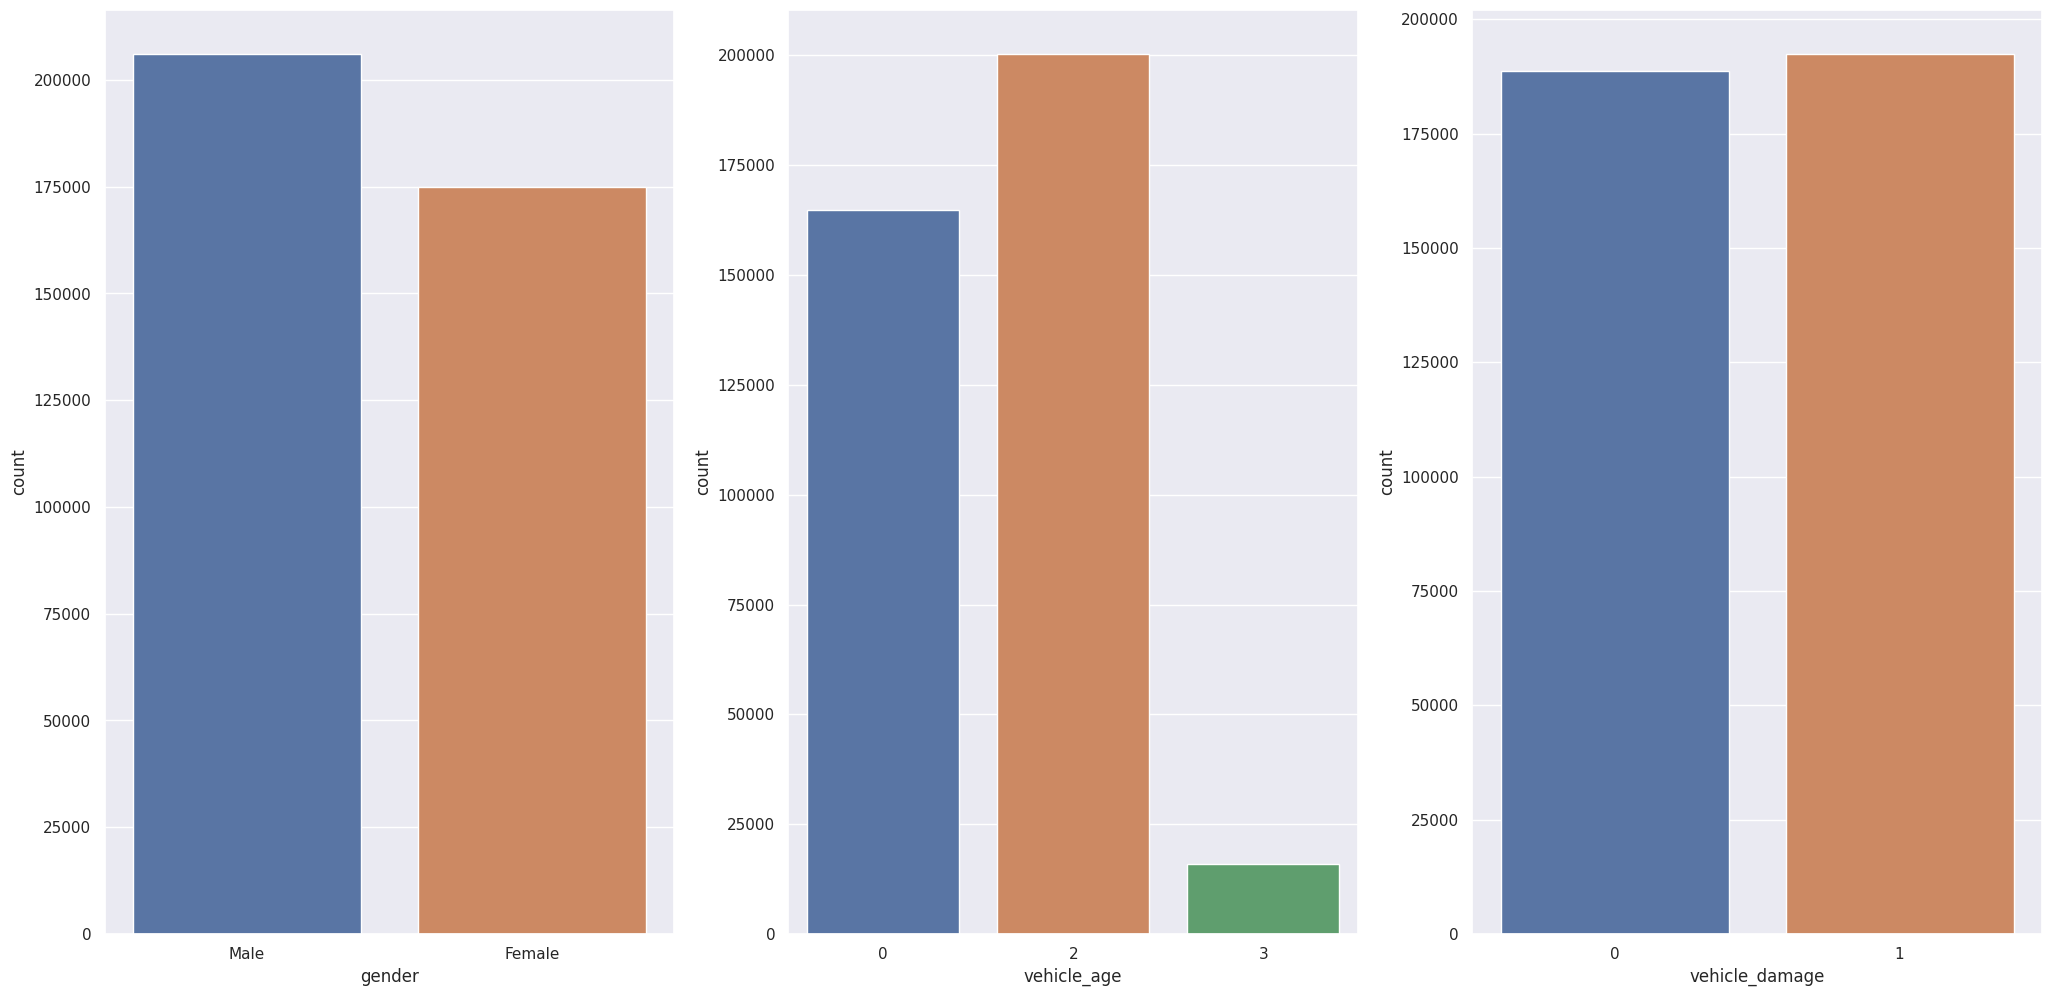

In [21]:
#categorical

#plot of gender
plt.subplot(1,3,1)
sns.countplot(x = 'gender', data = df4);

#plot vehichle age
plt.subplot(1,3,2)
sns.countplot(x = 'vehicle_age', data = df4);

#plot vehicle damage
plt.subplot(1,3,3)
sns.countplot(x = 'vehicle_damage', data=df4);

## 4.4 ANALSY BIVARIABLE

### H1 - Clientes acima de 40 anos tem mais interesse em seguro automotivo.

**Falso:** Clientes acima ou abaixo de 40 anos não possuem diferença de interesse. .

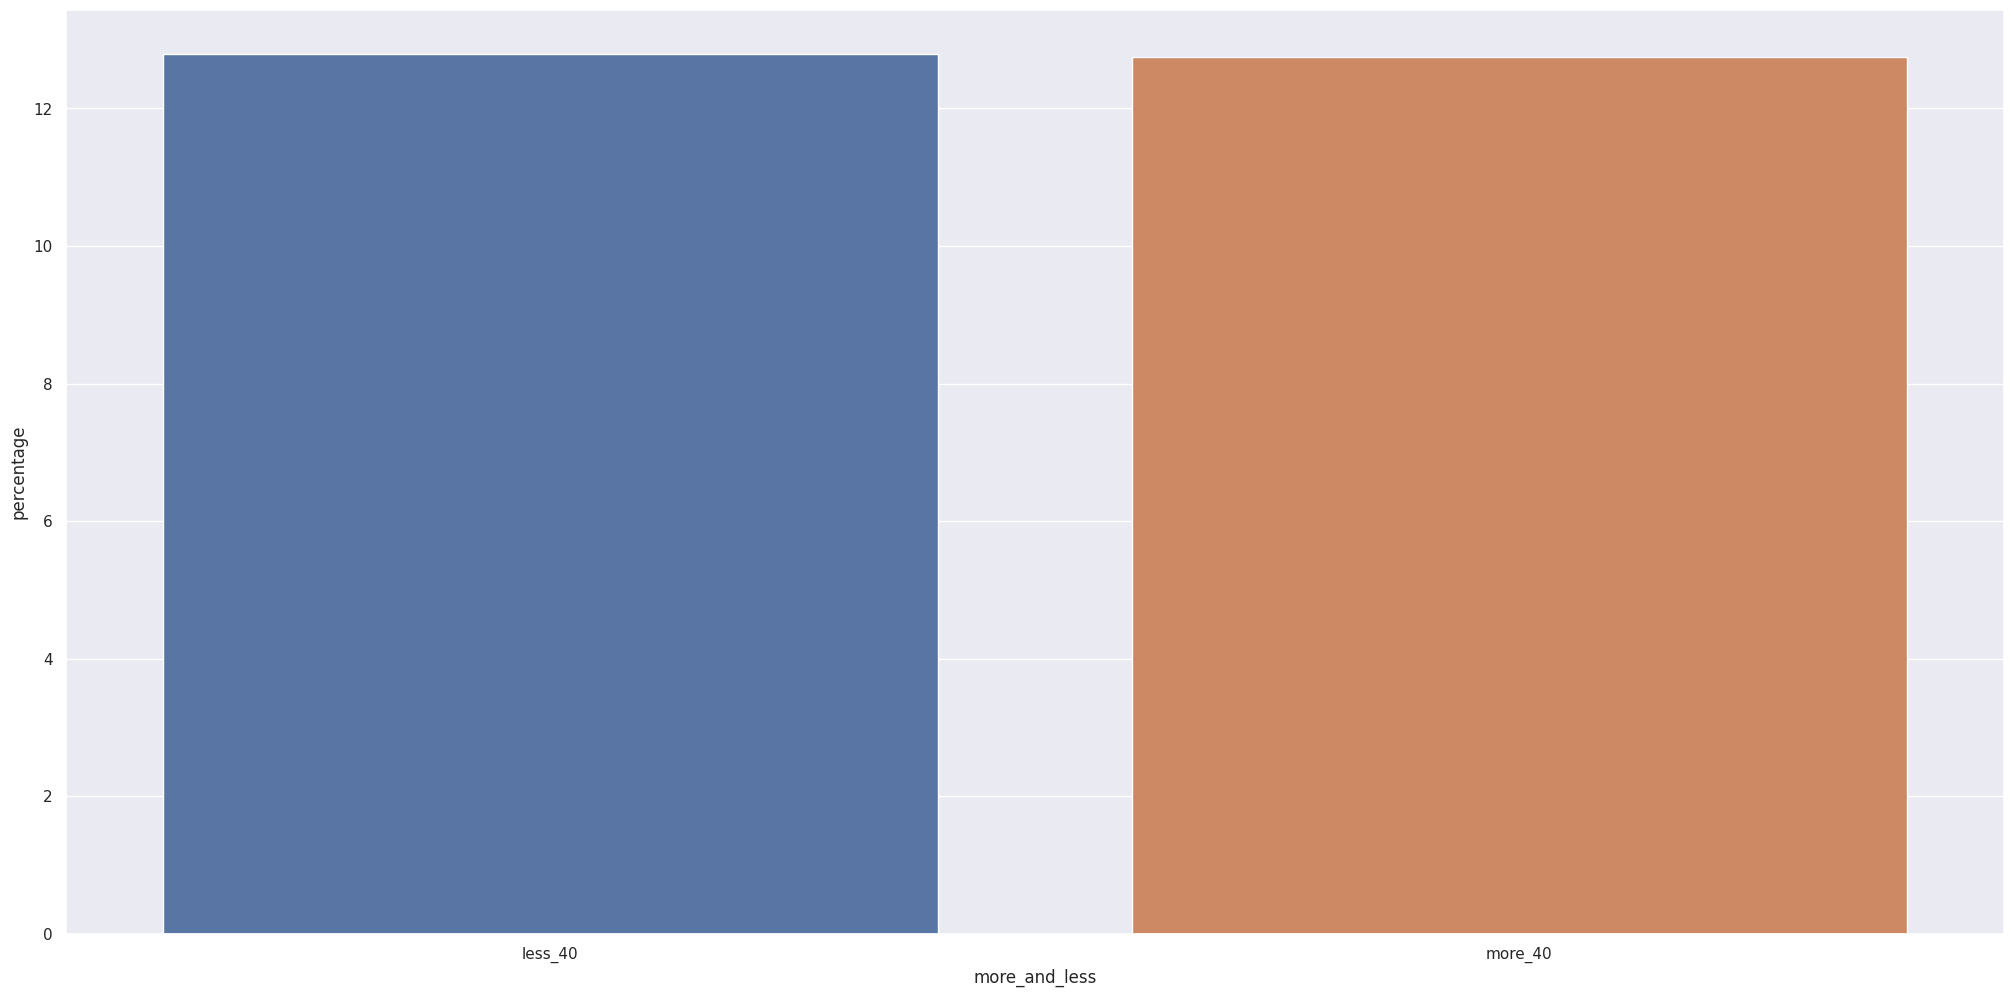

In [22]:
aux_h1 = df4[['age','response']].groupby('age').mean().reset_index() 

aux_h1['more_and_less'] = aux_h1['age'].apply(lambda x: 'more_40' if x> 40 else 'less_40' if x<= 40 else x )

aux_group_age = aux_h1[['response','more_and_less']].groupby('more_and_less').mean().reset_index()

aux_group_age['percentage'] = percentage(aux_group_age['response'])

sns.barplot(x='more_and_less',y='percentage', data=aux_group_age);

### H2 - Homens são mais habilitados do que mulheres.

**Falso:**  Homens e mulheres não possuem superioridade ou inferioridade entre habilitados

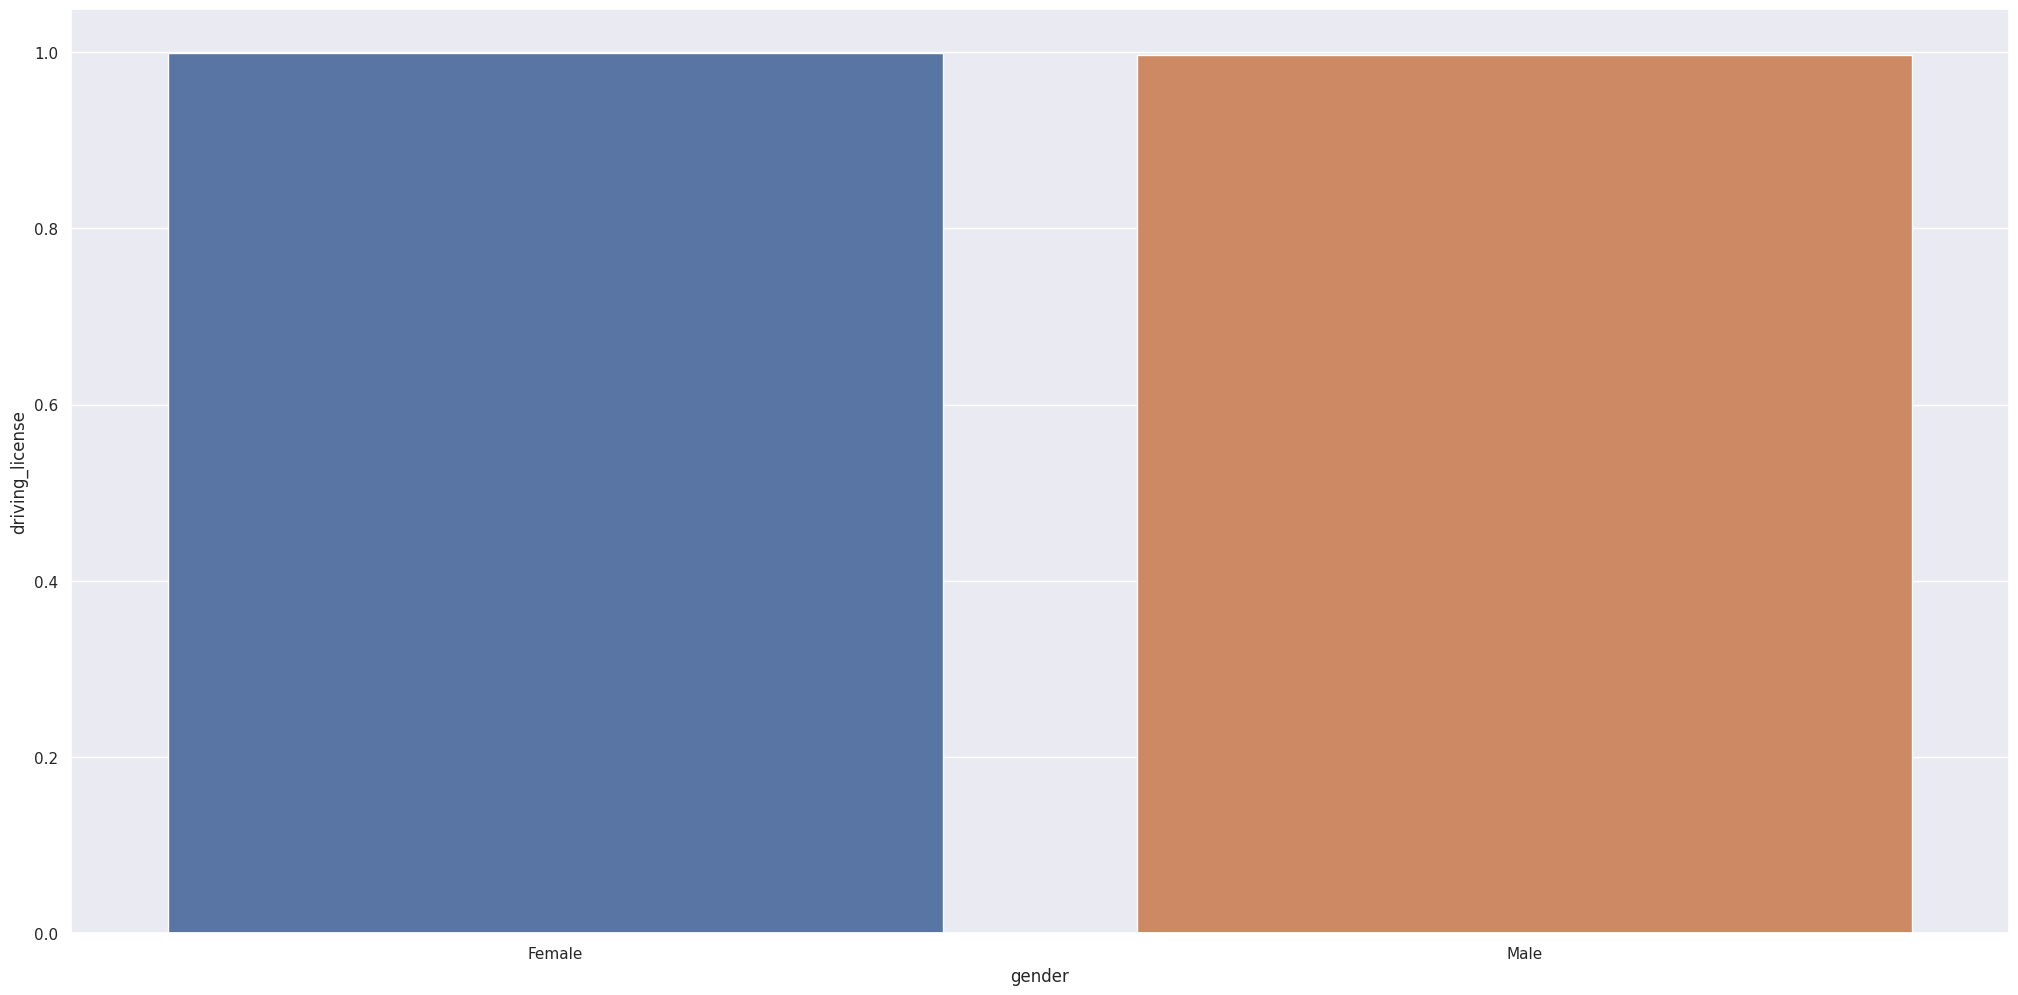

In [23]:
aux_h2= df4[['gender','driving_license']].groupby('gender').mean().reset_index()

sns.barplot(x= aux_h2['gender'], y= aux_h2['driving_license']);

### H3 - Mulheres tem mais seguros automotivos do que homens.
**Verdadeiro:** Mulheres tem mais seguros de veículos do que homens

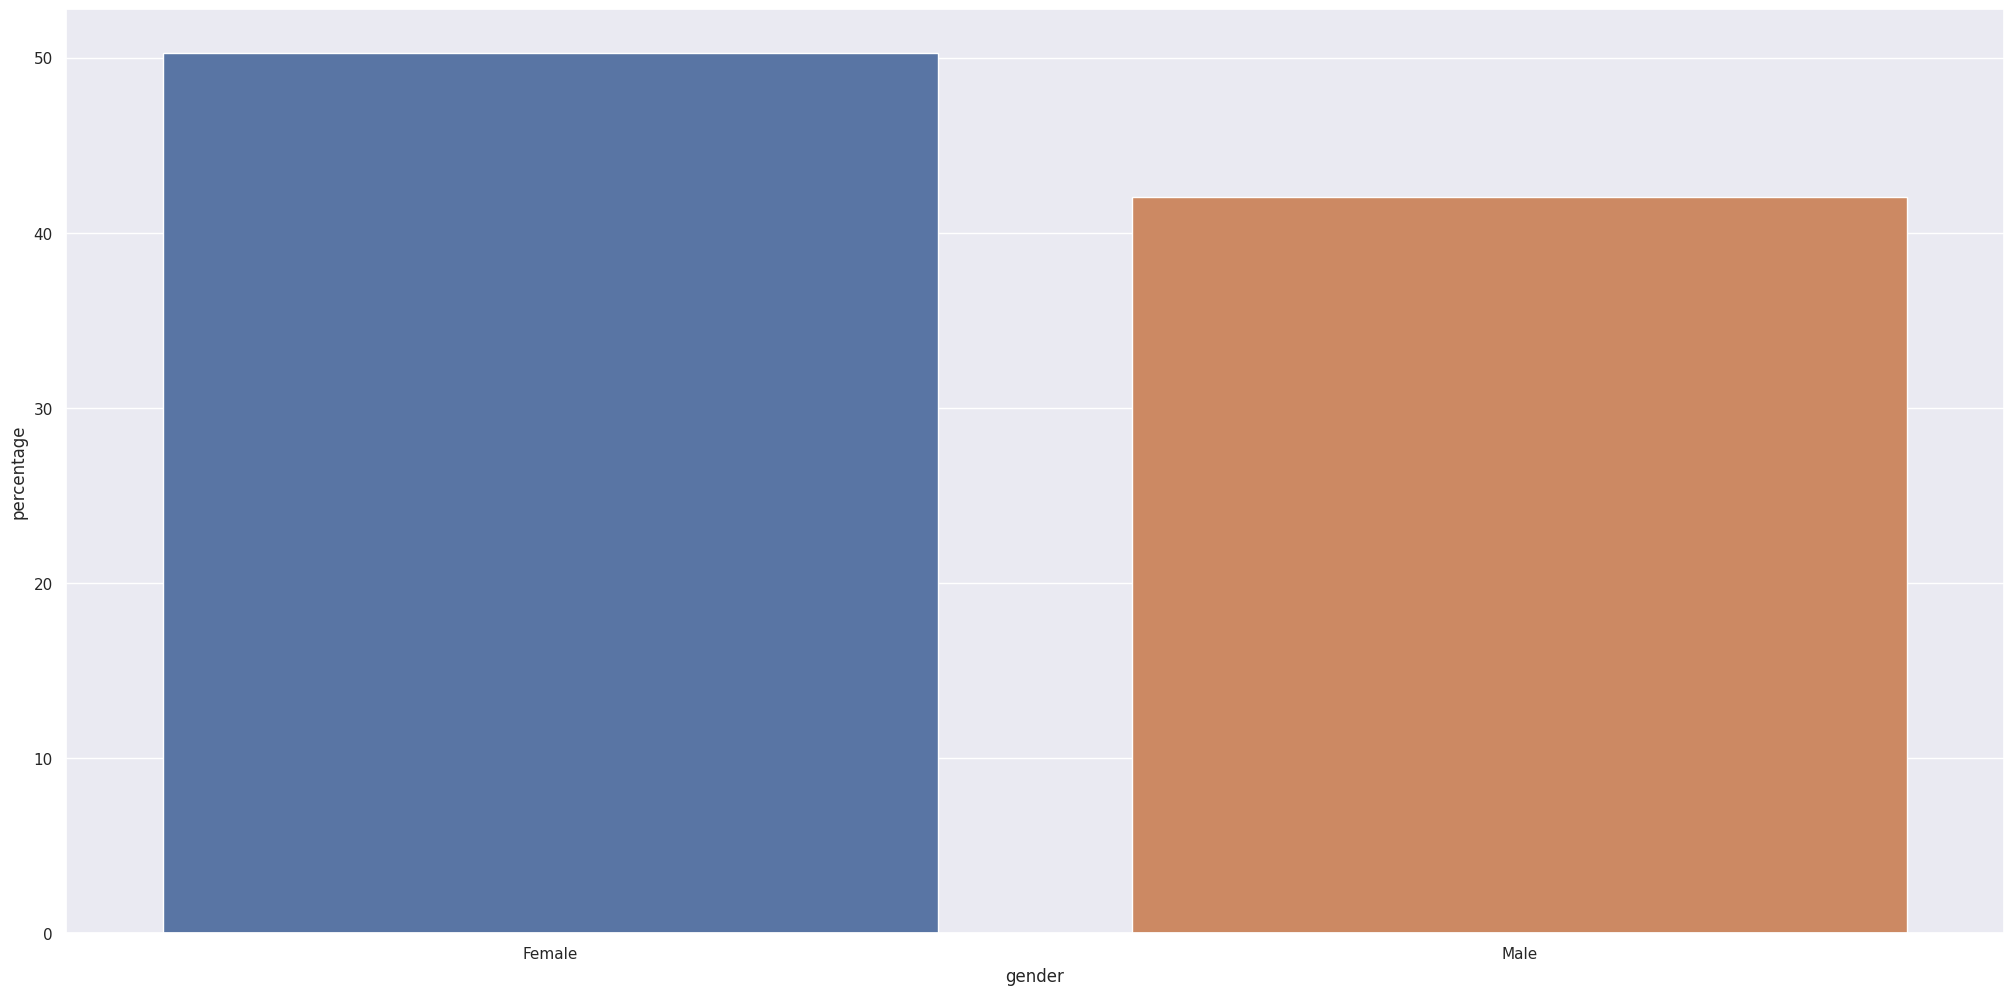

In [24]:
aux_h3 = df4[['gender','previously_insured']].groupby('gender').mean().reset_index()

aux_h3['percentage'] = percentage( aux_h3['previously_insured'] )

sns.barplot(x= 'gender', y = 'percentage', data=aux_h3);

### H4 - Homens danificam mais os veículos do que mulheres.

**Verdadeiro:** Homens danificam mais os veículos do que mulheres

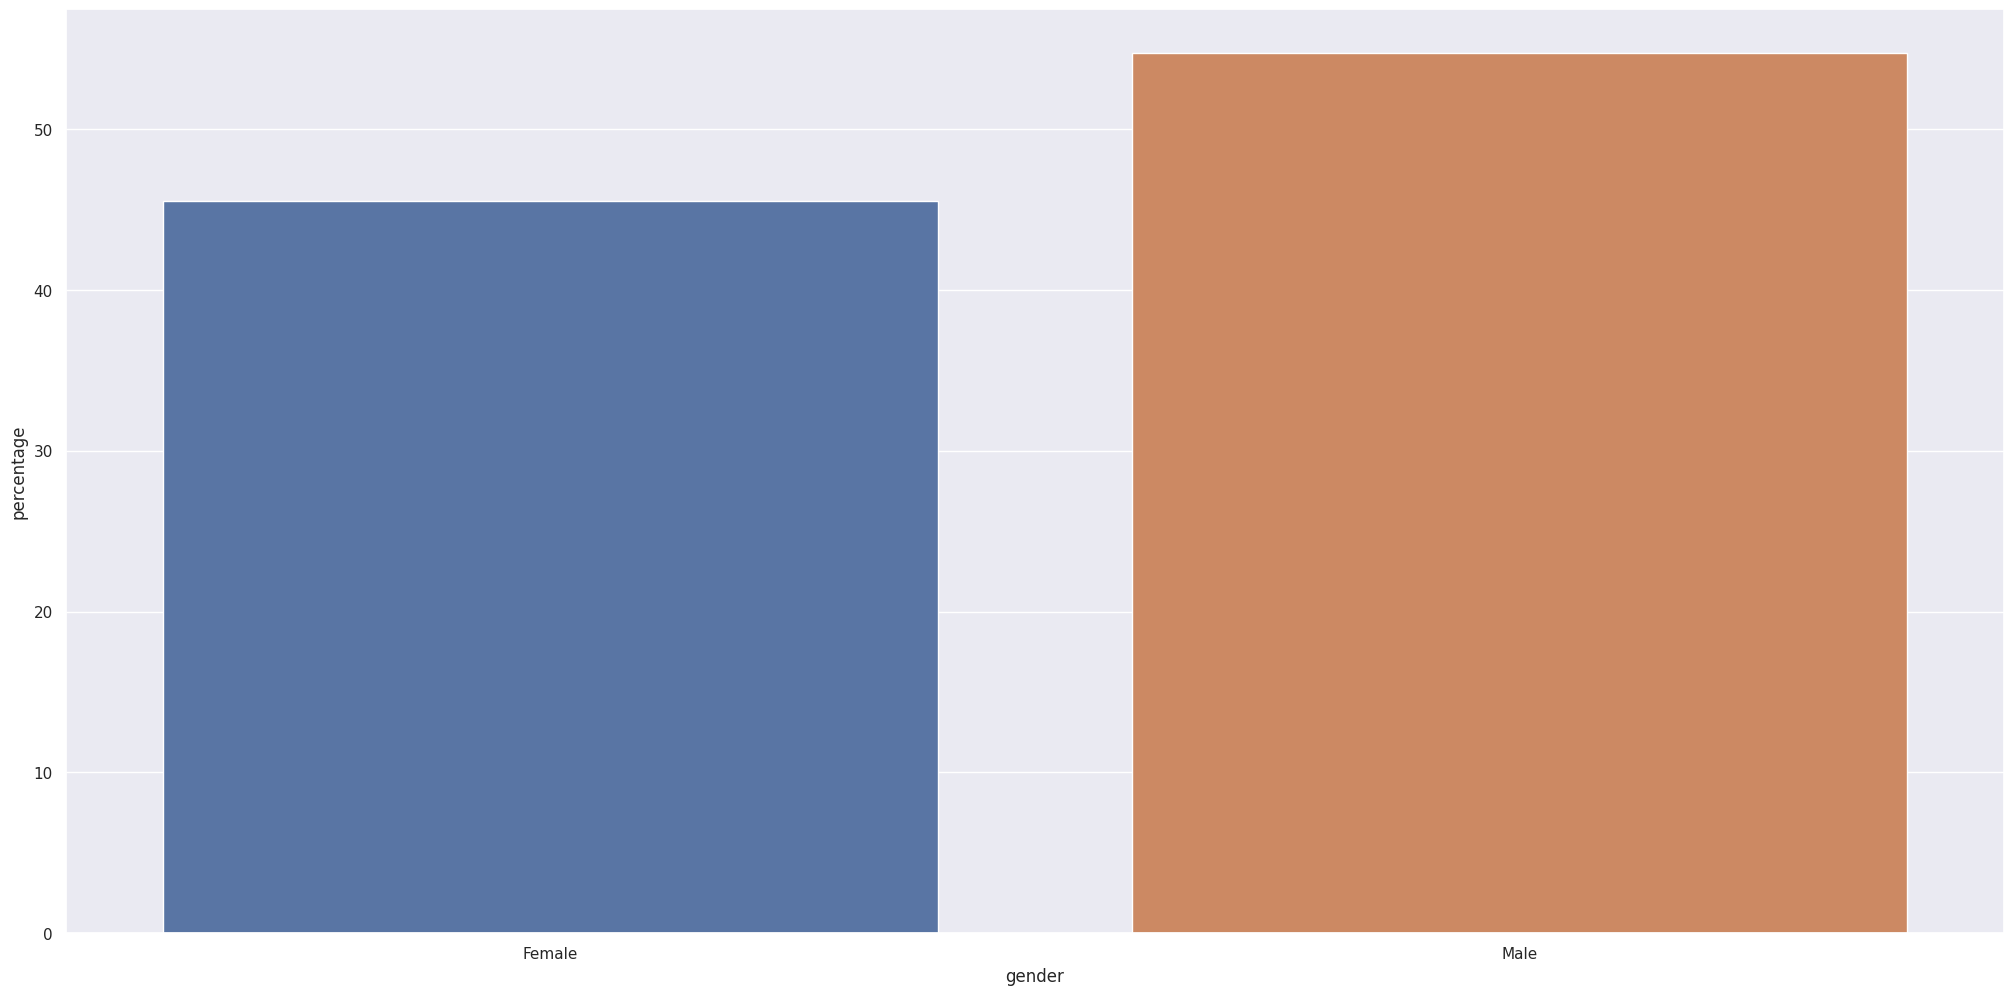

In [25]:
aux_h4 = df4[['gender','vehicle_damage']].groupby('gender').mean().reset_index()

aux_h4['percentage'] = percentage( aux_h4['vehicle_damage'] )

sns.barplot(x= 'gender', y = 'percentage', data= aux_h4);

### H5 - Homens tem mais interesse em seguro veícular do que mulheres
**Verdadeira:** Homens na média tem mais interesse em seguro veícular do que mulheres

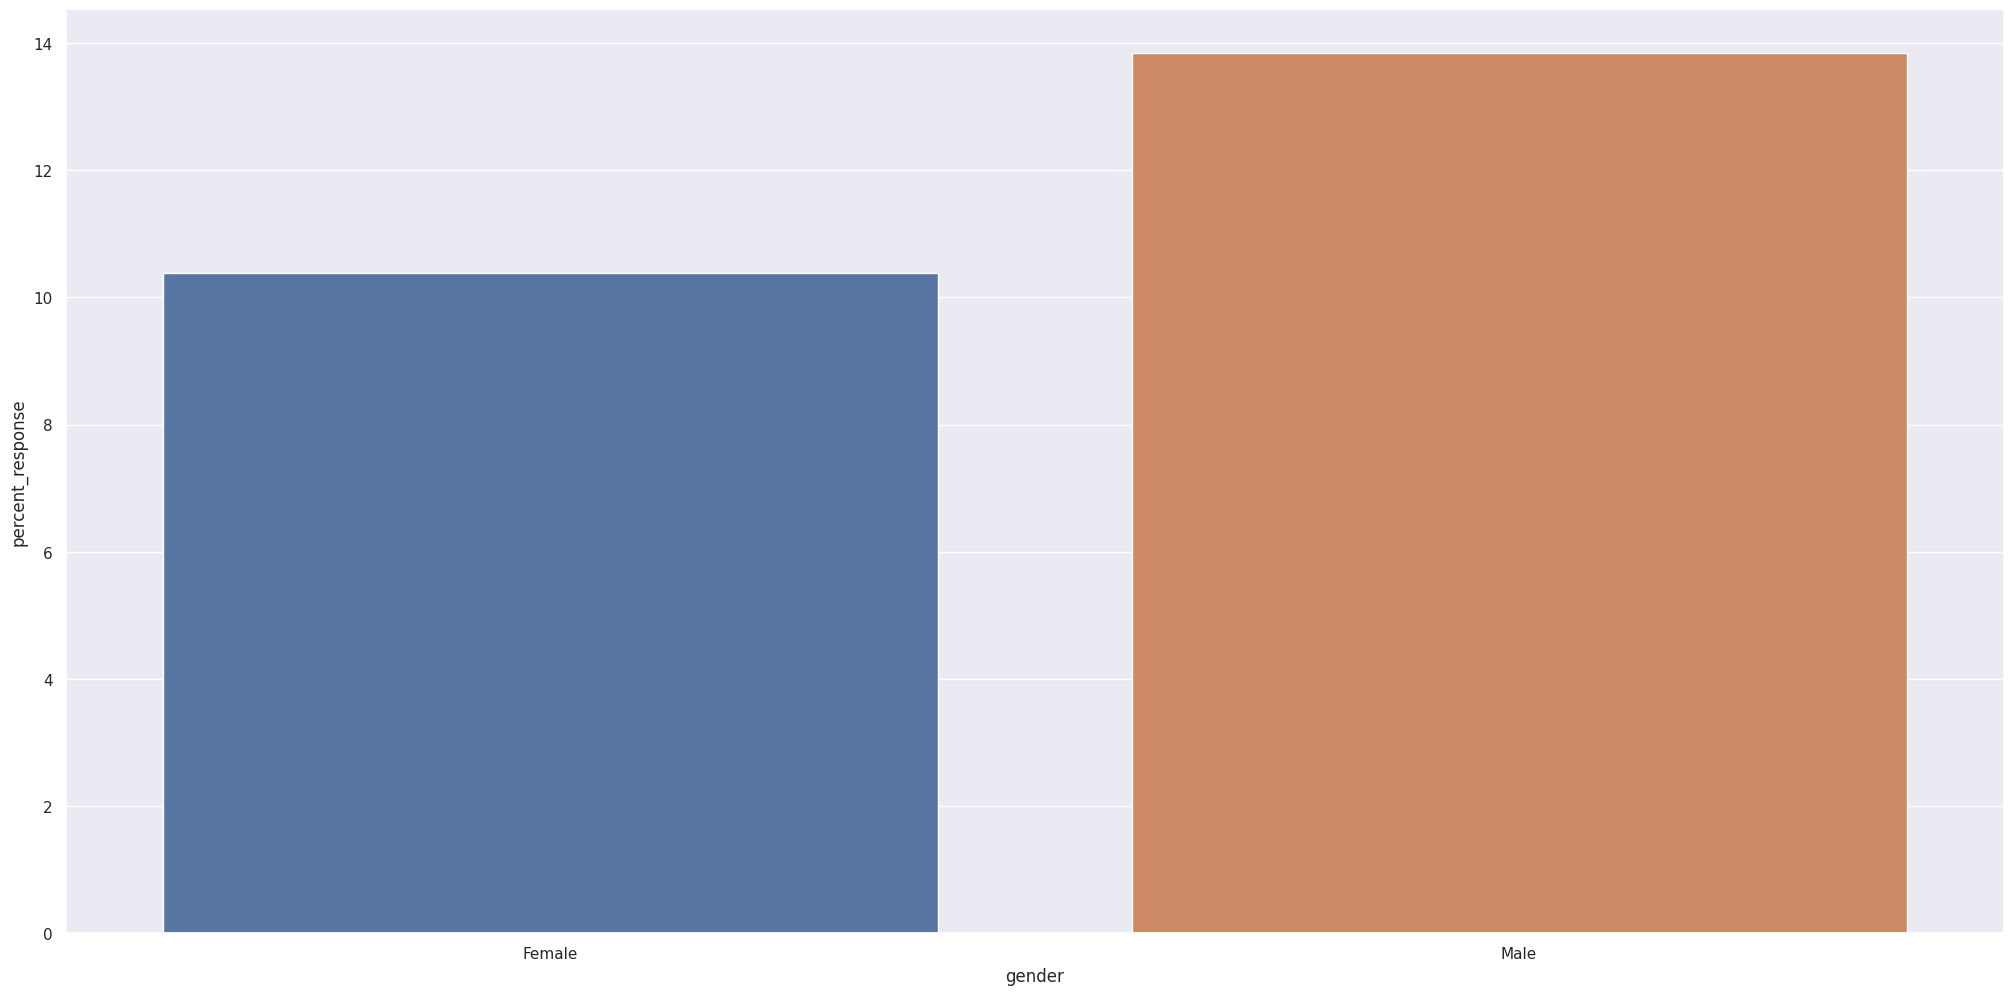

In [26]:
aux_h5 = df4[['gender', 'response']].groupby('gender').mean().reset_index()

#creating the new column to respost in percentage
aux_h5['percent_response']= percentage (aux_h5['response'] )

#plot the dataset
sns.barplot(x= 'gender', y = 'percent_response', data = aux_h5);


### H6 - Homens possuem carros mais novos
**Verdade:** Homens possuem carros mais novos na média.

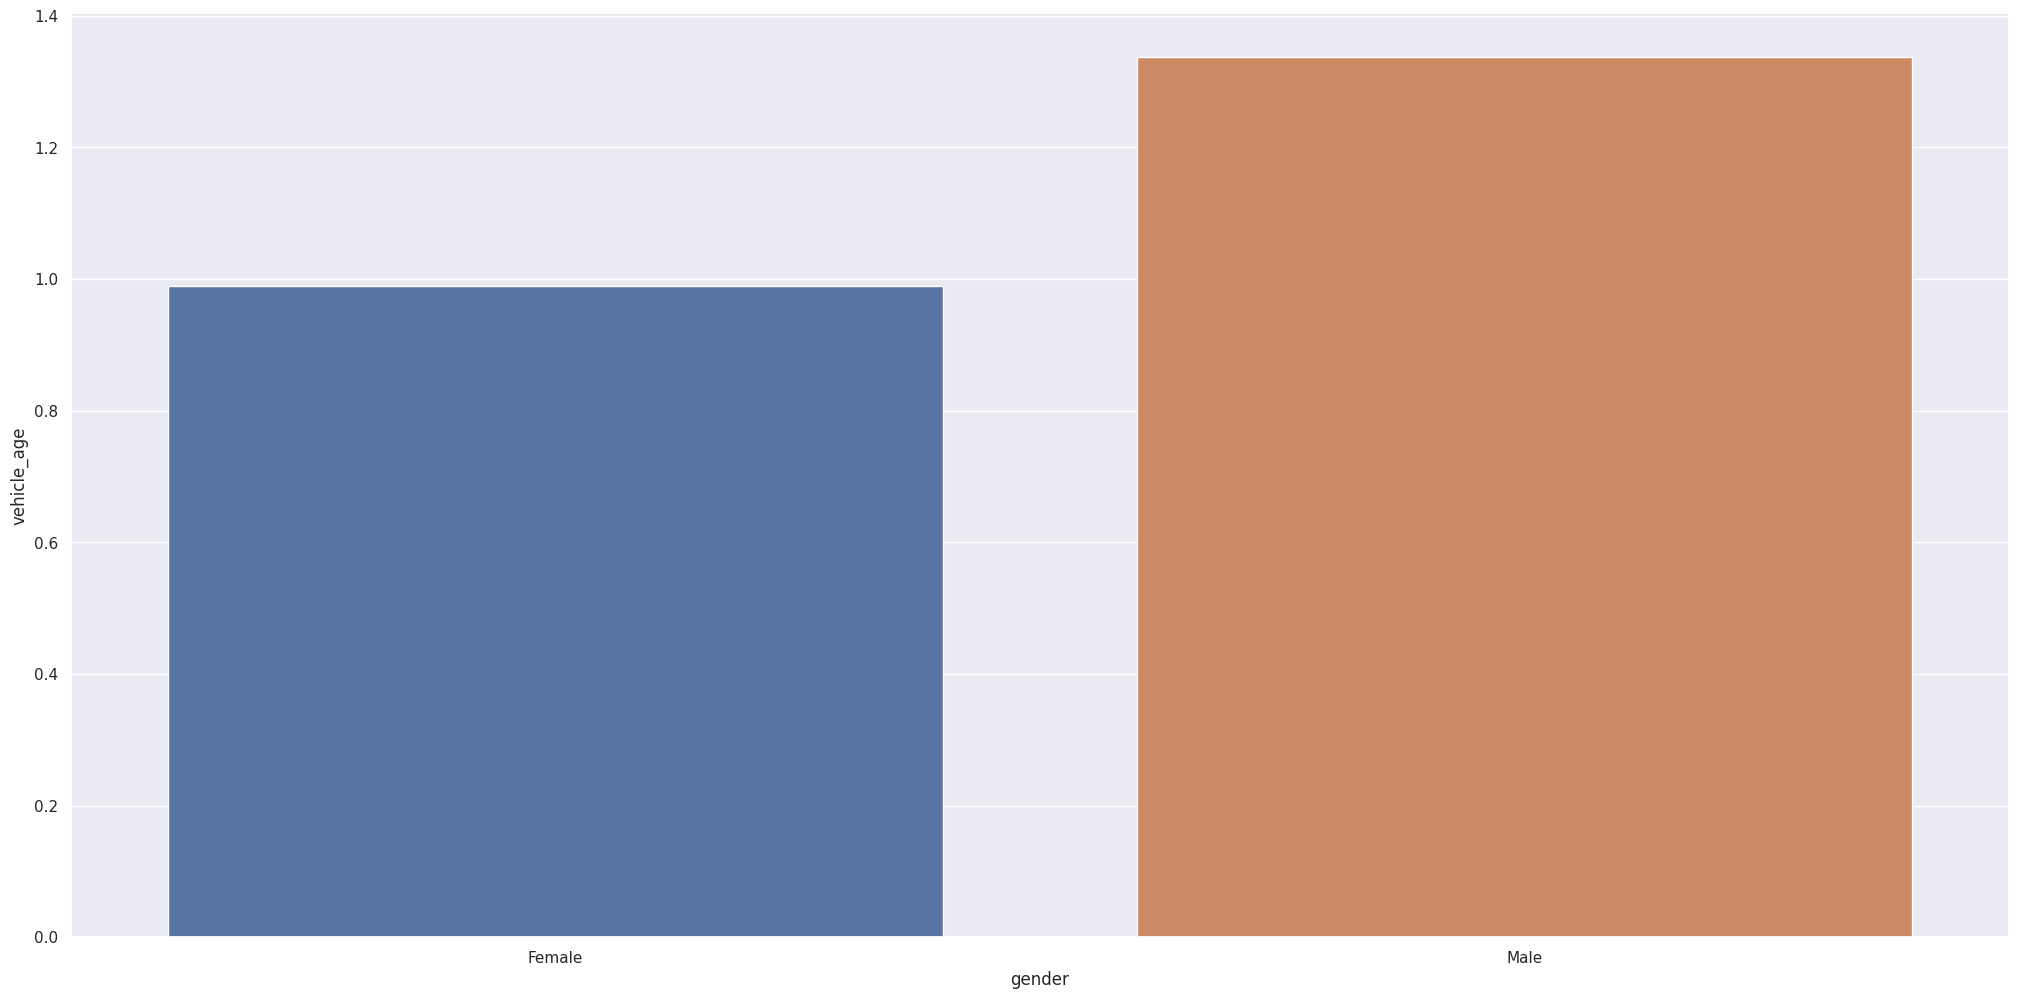

In [27]:
aux_h6 = df4[['gender','vehicle_age']].groupby('gender').mean().reset_index()


sns.barplot(x= 'gender', y= 'vehicle_age', data= aux_h6);


### H7 - O maior número de pessoas interessadas são pessoas com veículos com idade superior há 2 anos.
**Verdadeiro:** Número de pessoas com veículo com idade acima de 2 anos são os mais interessados em seguro veícular



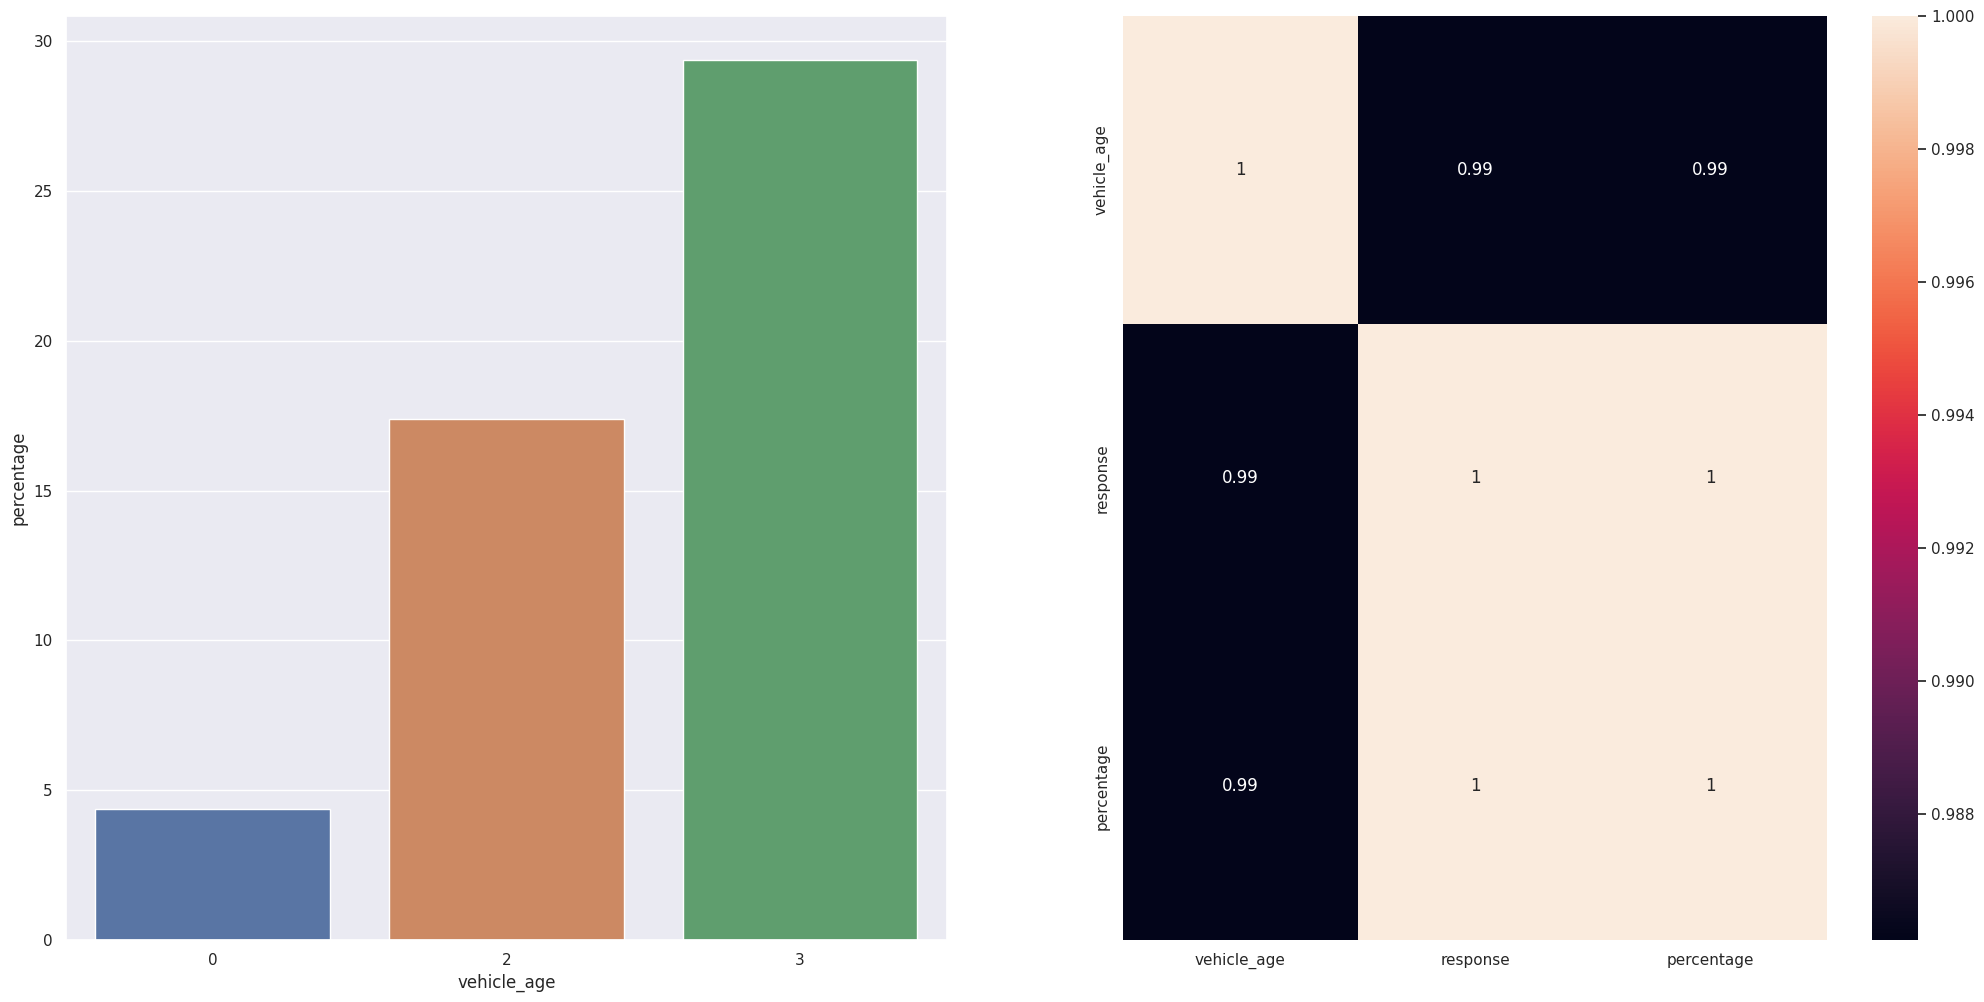

In [28]:
aux_h7 = df4[['vehicle_age','response']].groupby('vehicle_age').mean().reset_index()

#creating the colum of percentage of response
aux_h7['percentage'] = percentage( aux_h7['response'] )

#plot
plt.subplot(1,2,1)
sns.barplot(x='vehicle_age',y = 'percentage' ,data= aux_h7);

#plot of heatmap
plt.subplot(1,2,2)
sns.heatmap(aux_h7.corr (method='pearson'), annot=True);


### H8 -Pessoas que estão mais tempo com o plano de saúde tem mais interesse no seguro veícular.

**Verdadeira:** Pessoas que estão mais tempo com plano de saúde tem mais interesse em seguro veícular


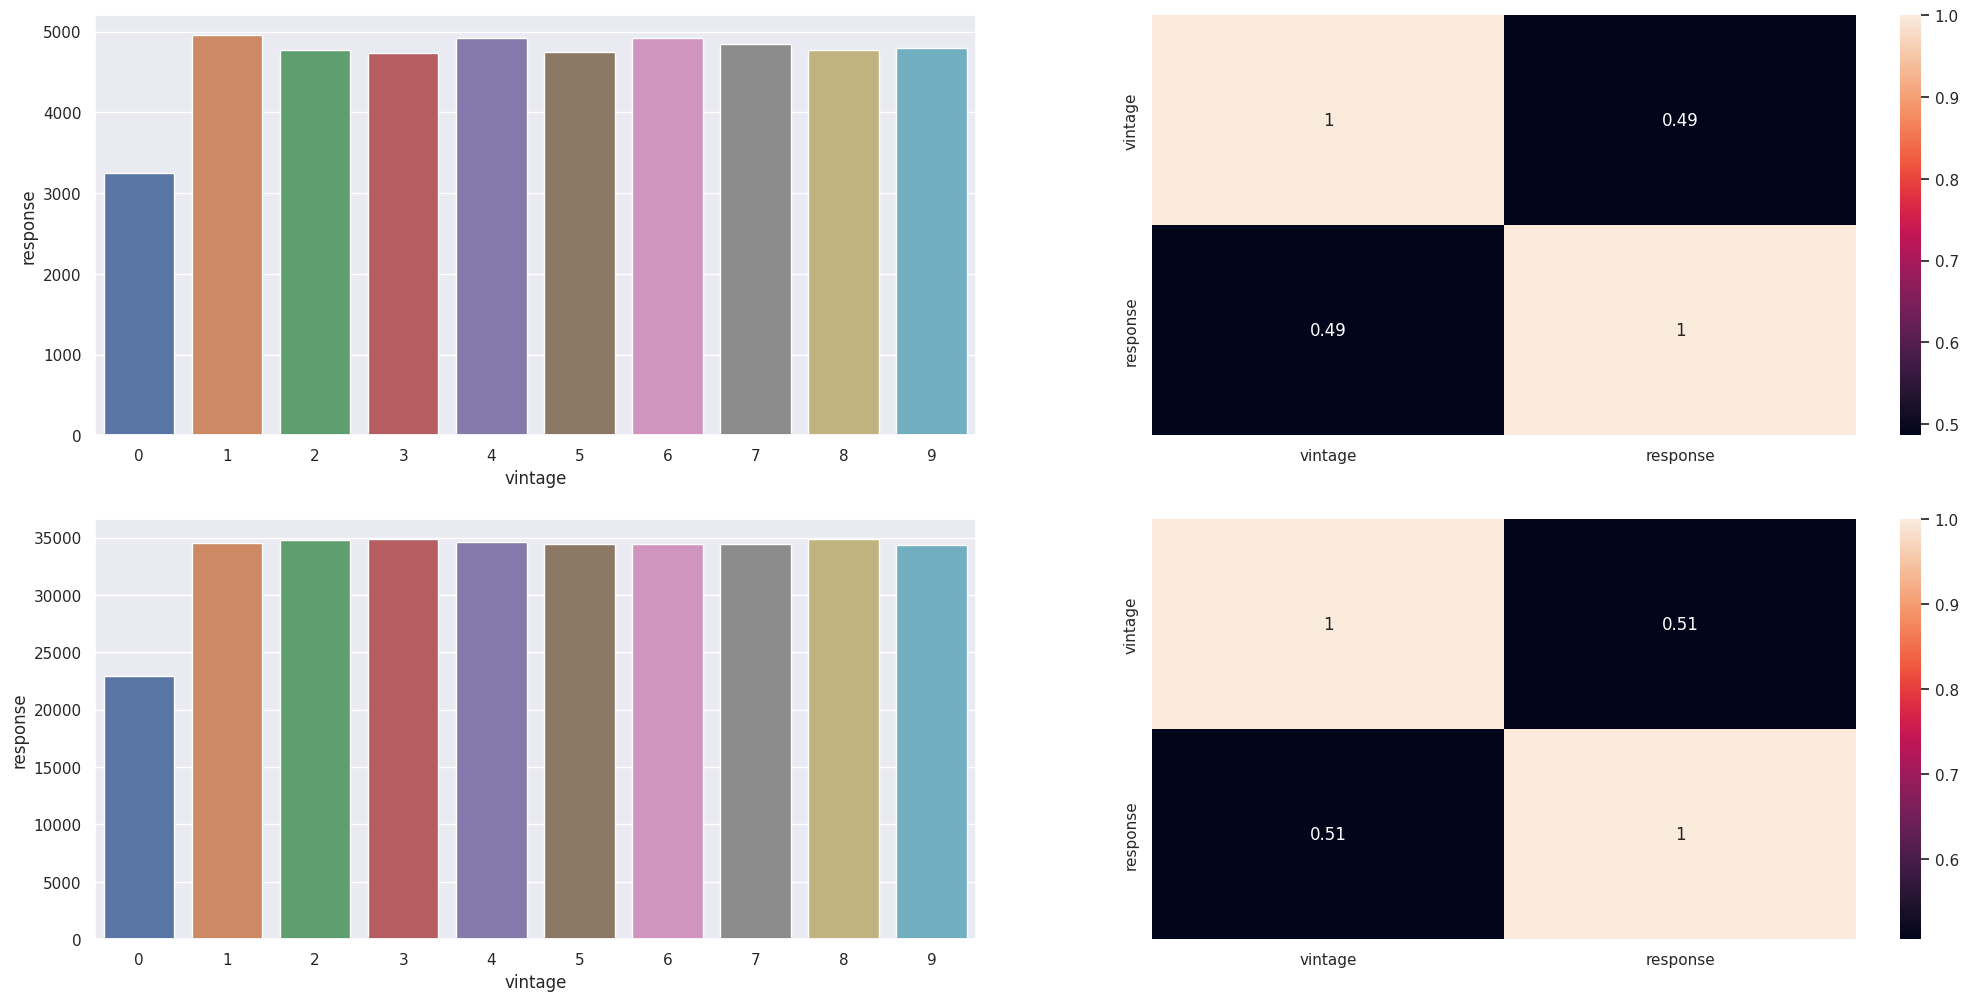

In [29]:
#filtering the people has interest
has_interest = df4.loc[df4['response'] == 1]

aux_1= has_interest[['vintage','response']].groupby('vintage').count().reset_index()

#plot the people has interest
plt.subplot(2,2,1)
sns.barplot(x= 'vintage', y = 'response', data= aux_1);

#plot the heatmap the people interest
plt.subplot(2,2,2)
sns.heatmap(aux_1.corr (method='pearson'), annot=True);

#people the people has not interest
has_not_interest = df4.loc[df4['response'] == 0]

aux_2 = has_not_interest[['vintage','response']].groupby('vintage').count().reset_index()

#plot the people not has interest
plt.subplot(2,2,3)
sns.barplot(x= 'vintage', y = 'response', data= aux_2);

#plot heatmap the people the has not interest
plt.subplot(2,2,4)
sns.heatmap(aux_2.corr (method='pearson'), annot=True);

### H8 - Carros mais antigos ocorrem mais danos.
**Falsa:** Carros mais antigos ocorrem menos danos

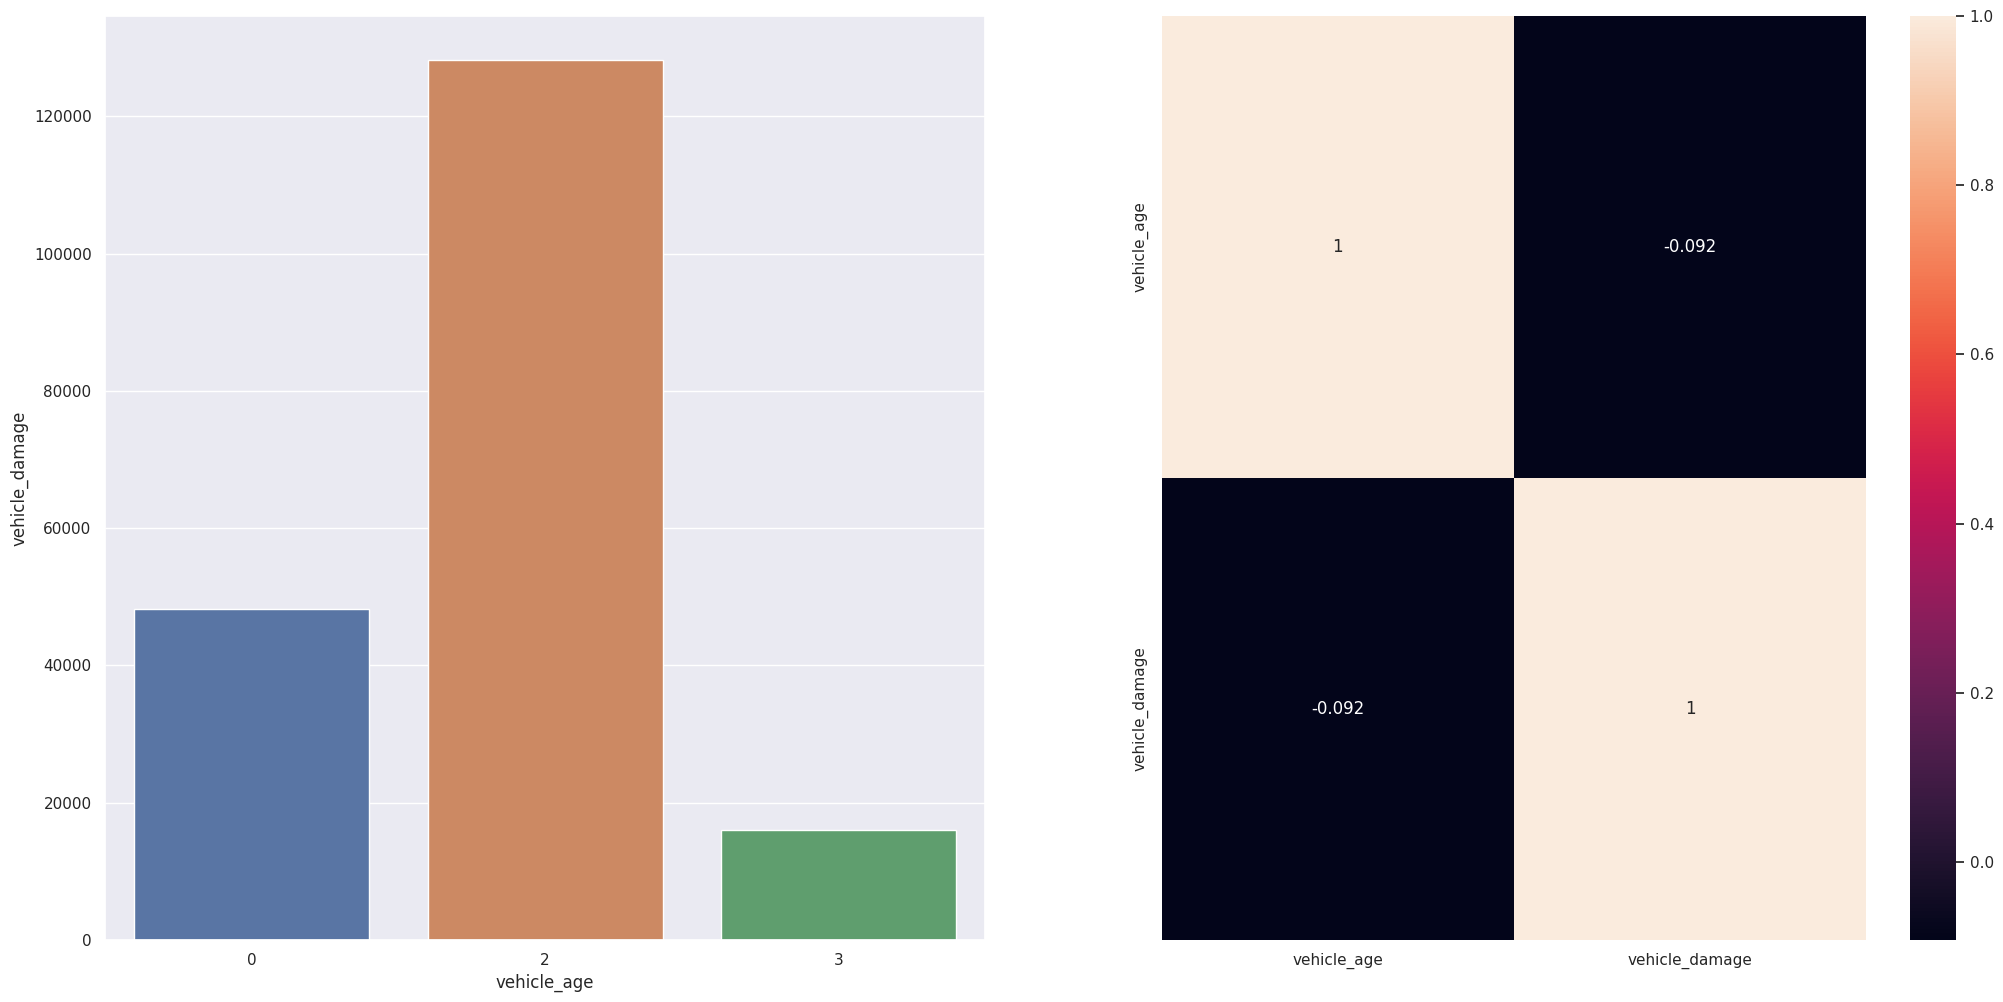

In [30]:
#filtering the data only with vehicle that past damage
aux_1 = df4.loc[df4['vehicle_damage']==1]

#grouping the dataset
aux_h9 = aux_1[['vehicle_damage','vehicle_age']].groupby('vehicle_age').count().reset_index()

#plot of bar
plt.subplot(1,2,1)
sns.barplot(x = 'vehicle_age',y= 'vehicle_damage', data = aux_h9);

#plot heatmap
plt.subplot(1,2,2)
sns.heatmap(aux_h9.corr (method='pearson'), annot=True);

### H9 - Pessoas que pagam mais pelo seguro de saúde tem menos interesse no seguro veícular.
**Falsa:** Pessoas que pagam mais pelo seguro de saúde tem mais interesse no seguro veícular do que as pessoas que pagam menos pelo seguro de saúde.

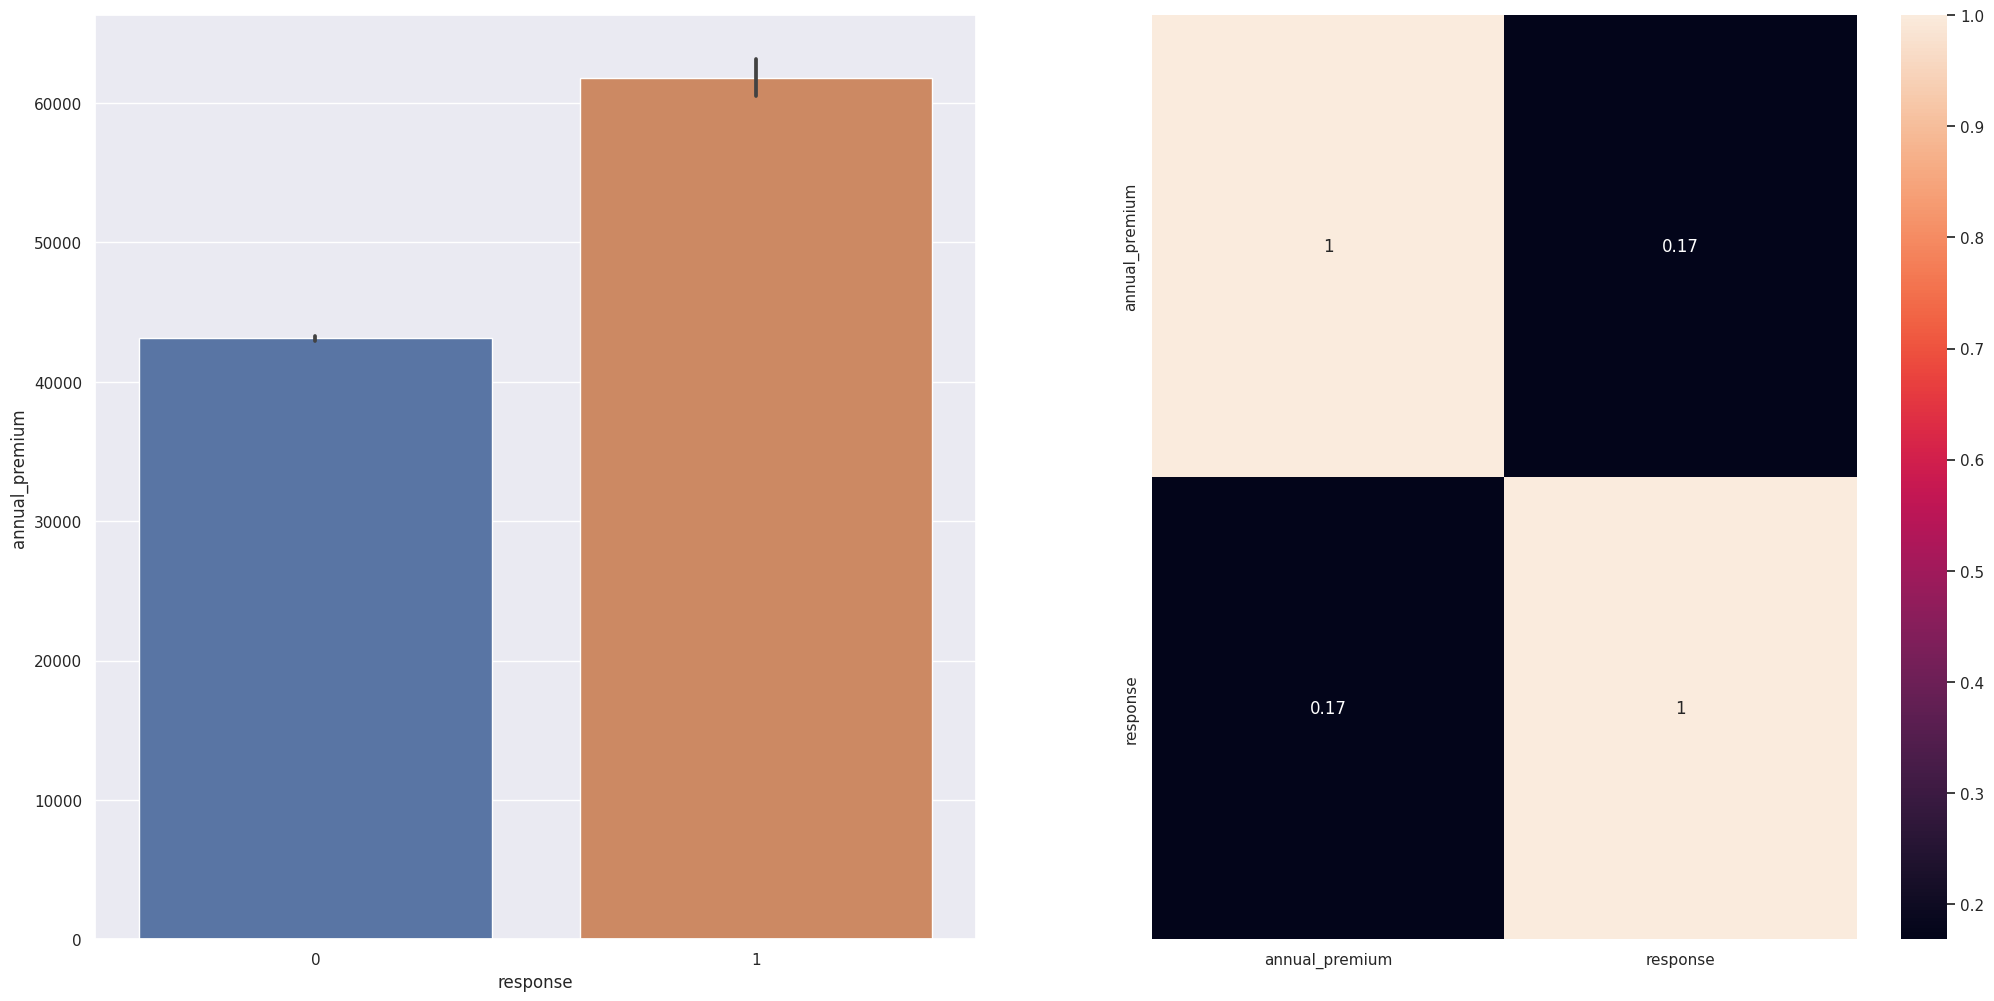

In [31]:
# created new variable
aux_h10 = df4[['annual_premium','response']].groupby('annual_premium').median().reset_index()

#transformating float in int
aux_h10['response'] = aux_h10['response'].astype('int')

#plot comparative
plt.subplot(1,2,1)
sns.barplot(x = 'response', y = 'annual_premium', data= aux_h10);

#plt the heatmap
plt.subplot(1,2,2)
sns.heatmap(aux_h10.corr(method='pearson'), annot=True);

### H10 - Pessoas que pagam menos pelo seguro de saúde tem mais registros de danos nos veículos.

**Verdadeira:** Pessoas que pagama menos pelo seguro de saúde tem mais registros de danos nos veículos.

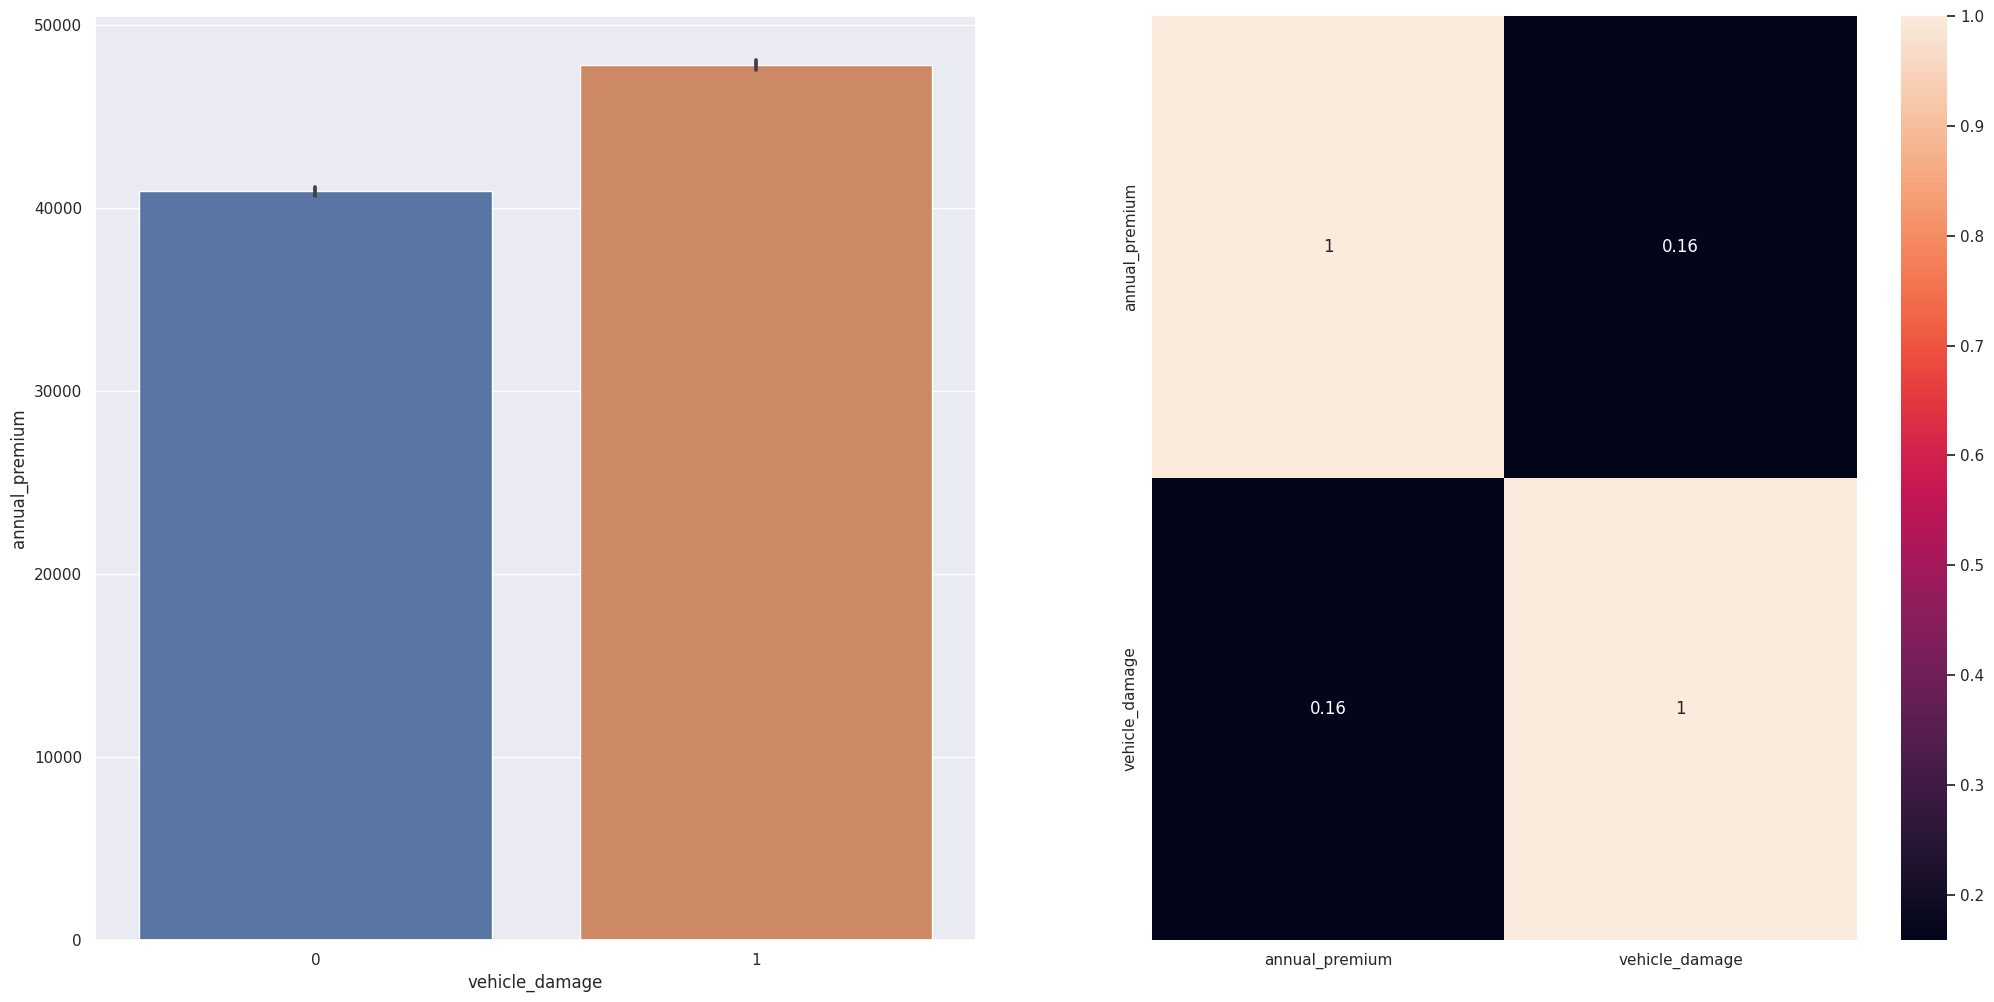

In [32]:
aux_h11 = df4[['annual_premium','vehicle_damage']].groupby('annual_premium').median().reset_index()

#transforming float in integer
aux_h11['vehicle_damage'] = aux_h11['vehicle_damage'] .astype('int')

#plot of bar
plt.subplot(1,2,1)
sns.barplot(x = 'vehicle_damage', y = 'annual_premium', data= aux_h11);

#plot the heatmap
plt.subplot(1,2,2)
sns.heatmap(aux_h11.corr (method='pearson'), annot=True);

### H11 - Pessoas que pagam mais pelo seguro de saúde tem carros mais novos.
**Falsa:** Pessoas que pagam mais pelo seguro de saúde tem carros mais antigos.

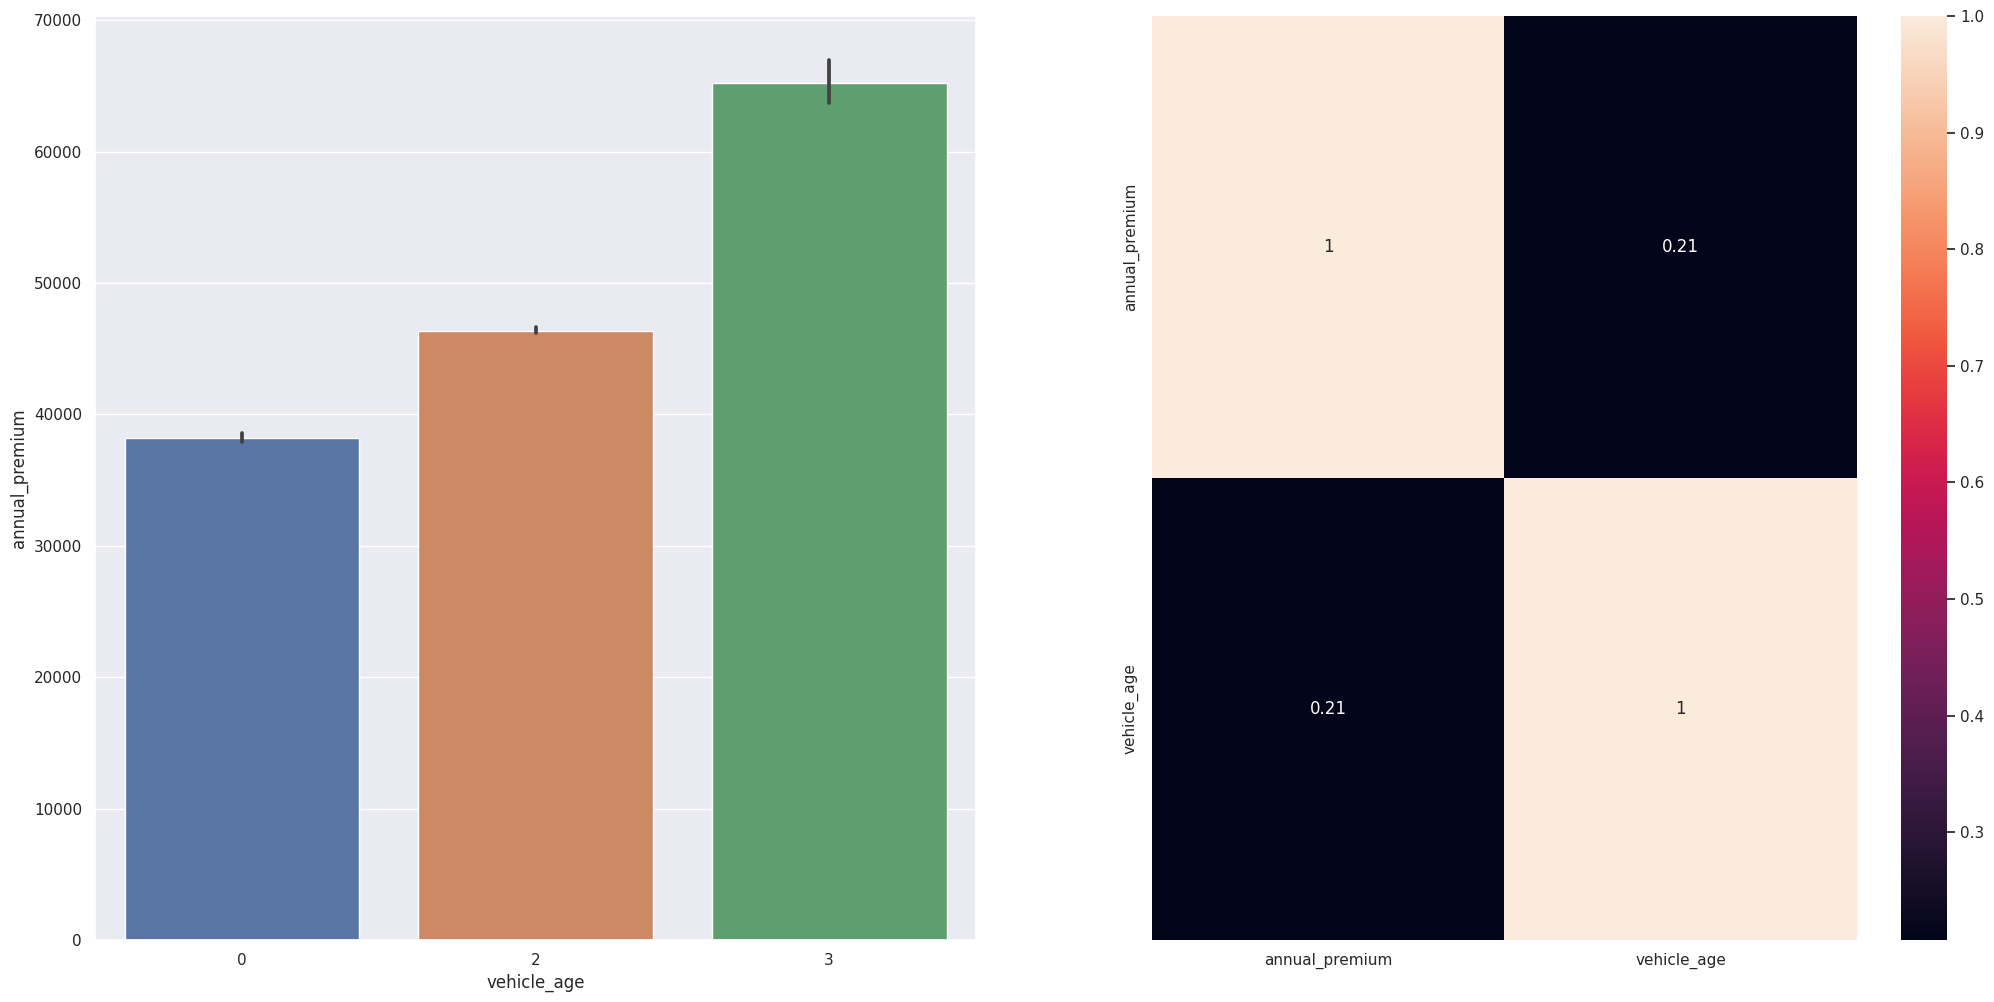

In [33]:
aux_h12 = df4[['annual_premium','vehicle_age']].groupby('annual_premium').median().reset_index()

#transforming float in intenger
aux_h12['vehicle_age'] = aux_h12['vehicle_age'].astype('int')

# Making the ajust in data
aux_h12['vehicle_age'] = aux_h12['vehicle_age'].apply(lambda x: 2 if x==1 else x)

#plot the bar
plt.subplot(1,2,1)
sns.barplot(x = 'vehicle_age', y = 'annual_premium', data= aux_h12);

#plot the heatmap
plt.subplot(1,2,2)
sns.heatmap(aux_h12.corr(method='pearson'), annot= True);

### 4.4.1 Sumary Hypothesis

In [51]:
tab = [ 
    ['Hypothesis','Conclusion','Relevance'],
    ['H1','False', 'Mean'],
    ['H2','False', 'Low' ],
    ['H3','True', 'High' ],
    ['H4','True' , 'High' ],
    ['H5','True', 'High' ],
    ['H6','True', 'Mean' ],
    ['H7','True', 'High' ],
    ['H8','False', 'High'],
    ['H9','False', 'High'],
    ['H10','True', 'High'],
    ['H11','False','High'] ]

print(tabulate(tab, headers= 'firstrow') )
      

Hypothesis    Conclusion    Relevance
------------  ------------  -----------
H1            False         Mean
H2            False         Low
H3            True          High
H4            True          High
H5            True          High
H6            True          Mean
H7            True          High
H8            False         High
H9            False         High
H10           True          High
H11           False         High


### 4.5 Analasy Mutivariable

### 4.5.1 Numerical Attributes

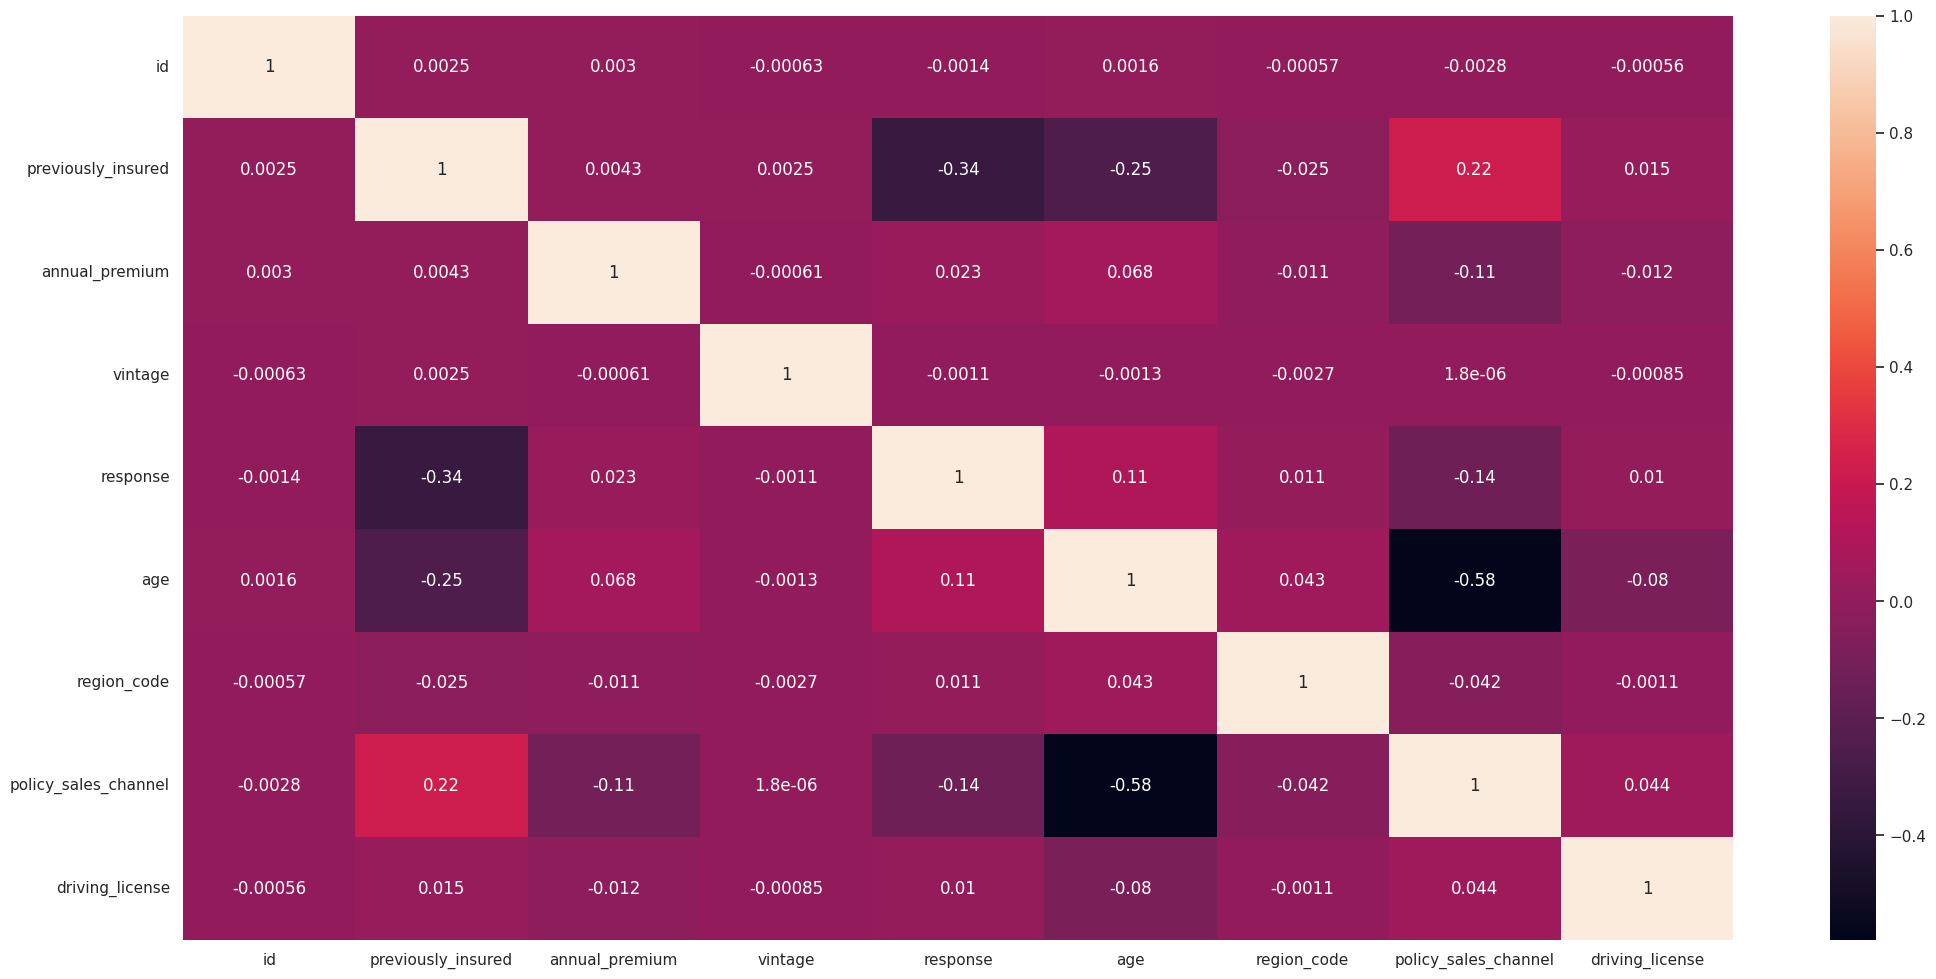

In [59]:
#plot heatmap of correlation numeric
sns.heatmap(num_attributes.corr(method='pearson'), annot= True );